In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno

from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

## 0. 폐기물 발생 및 처리현황 (생활계폐기물)

In [2]:
# 데이터 불러오기
df_waste = pd.read_csv('./datas/waste.csv', header=[0,1,2,3], index_col=[0,1,2])
df_waste

시도별(1)         1996                                                        \
시도별(1)           총계 종량제방식에의한혼합배출                                            
시도별(1)           소계          가연성                                            
시도별(1)           소계           소계  음식물 채소류     종이류     나무류   고무피혁류   플라스틱류   
강원 발생량 소계    1727.0        914.0    394.0   205.0    64.0    34.0    64.0   
   처리량 기타       0.0          0.0      0.0     0.0     0.0     0.0     0.0   
       매립    1421.0        855.0    390.0   183.0    50.0    32.0    54.0   
       소각      57.0         57.0      2.0    22.0    14.0     2.0    10.0   
       재활용    249.0          2.0      2.0     0.0     0.0     0.0     0.0   
...             ...          ...      ...     ...     ...     ...     ...   
합계 발생량 소계   49925.2      30305.7  14531.8  6379.7  1856.7  1121.9  2166.4   
   처리량 기타       0.0          0.0      0.0     0.0     0.0     0.0     0.0   
       매 립  34115.6      26905.3  13486.4  5276.5  1420.7   997.6  1907.6   
       소 각   2725.0       2668.3    569.5   994.7   386.0   111.3   229.2   
       재활용  13084.6        732.1    475.9   108.5    50.0    13.0    29.6   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)                 불연성          ...          윤활유   형광등     고철류     의류   
시도별(1)          기타      소계     연탄재  ...           소계    소계      소계     소계   
강원 발생량 소계    153.0   567.0   210.0  ...         13.3   0.6    39.8   18.5   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매립    146.0   566.0   210.0  ...          0.0   0.0     0.0    0.0   
       소각      7.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용     0.0     1.0     0.0  ...         13.3   0.6    39.8   18.5   
...            ...     ...     ...  ...          ...   ...     ...    ...   
합계 발생량 소계   4249.2  7456.7  1852.9  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매 립  3816.5  7089.5  1821.6  ...          0.0   0.0     0.0    0.0   
       소 각   377.6    13.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    55.1   354.2    31.3  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
강원 발생량 소계    37.9   12.3   0.9    53.1    33.6       453.6  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매립     0.0    0.0   0.0     0.0     0.0        23.0  
       소각     0.0    0.0   0.0     0.0     0.0        23.7  
       재활용   37.9   12.3   0.9    53.1    33.6       406.9  
...           ...    ...   ...     ...     ...         ...  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[89 rows x 605 columns]

In [3]:
df_waste.columns.values[:10], len(df_waste.columns.values)

(array([('1996', '총계', '소계', '소계'), ('1996', '종량제방식에의한혼합배출', '가연성', '소계'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '음식물 채소류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '종이류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '나무류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '고무피혁류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '플라스틱류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '기타'),
        ('1996', '종량제방식에의한혼합배출', '불연성', '소계'),
        ('1996', '종량제방식에의한혼합배출', '불연성', '연탄재')], dtype=object),
 605)

In [4]:
# 중분류의 소계 지우기
for i in range(1996, 2019):
    df_waste.drop([('{}'.format(i), '종량제방식에의한혼합배출', '가연성', '소계'),
               ('{}'.format(i), '종량제방식에의한혼합배출', '불연성', '소계'),
               ('{}'.format(i), '재활용가능자원 분리배출', '소계', '소계')], axis=1, inplace=True)

In [5]:
df_waste.columns.values[:10], len(df_waste.columns.values)

(array([('1996', '총계', '소계', '소계'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '음식물 채소류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '종이류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '나무류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '고무피혁류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '플라스틱류'),
        ('1996', '종량제방식에의한혼합배출', '가연성', '기타'),
        ('1996', '종량제방식에의한혼합배출', '불연성', '연탄재'),
        ('1996', '종량제방식에의한혼합배출', '불연성', '금속류'),
        ('1996', '종량제방식에의한혼합배출', '불연성', '토사류')], dtype=object),
 536)

## 1. 생활계폐기물 발생 및 처리현황

In [6]:
# 합계(전국) 인덱스만 추출
df_waste_total = df_waste.loc[[('합계', '발생량', '소계'), ('합계', '처리량', '기타'), ('합계', '처리량', '매 립'), ('합계', '처리량', '소 각'), ('합계', '처리량', '재활용')]]

In [7]:
df_waste_total.index

MultiIndex([('합계', '발생량',  '소계'),
            ('합계', '처리량',  '기타'),
            ('합계', '처리량', '매 립'),
            ('합계', '처리량', '소 각'),
            ('합계', '처리량', '재활용')],
           )

In [8]:
df_waste_total.index = ['발생량', '기타 처리량', '매립 처리량', '소각 처리량', '재활용 처리량']

In [9]:
df_waste_total = df_waste_total.T

In [10]:
df_waste_total.index.values[:10]

array([('1996', '총계', '소계', '소계'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '음식물 채소류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '종이류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '나무류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '고무피혁류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '플라스틱류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '기타'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '연탄재'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '금속류'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '토사류')], dtype=object)

In [11]:
# 연도 추가
year = []
for i in range(0, len(df_waste_total.index)):
    year.append(df_waste_total.index.values[i][0])

df_waste_total['연도'] = year

In [12]:
# 알아보기 편하게 인덱스 수정

gubun = []
for i in range(0, len(df_waste_total.index)):
    if df_waste_total.index.values[i][1] == '총계':
        gubun.append('총계')
    elif df_waste_total.index.values[i][1] == '종량제방식에의한혼합배출':
        gubun.append(df_waste_total.index.values[i][3]+'('+df_waste_total.index.values[i][2]+')')
    elif df_waste_total.index.values[i][1] == '재활용가능자원 분리배출':
        gubun.append(df_waste_total.index.values[i][2])
    elif df_waste_total.index.values[i][1] == '음식물류폐기물분리배출':
        gubun.append('음식물류')
        
df_waste_total.index = gubun

In [13]:
df_waste_total.columns

Index(['발생량', '기타 처리량', '매립 처리량', '소각 처리량', '재활용 처리량', '연도'], dtype='object')

In [14]:
# 컬럼 순서 변경
cols = df_waste_total.columns[[5,0,2,3,4,1]]
df_waste_total = df_waste_total[cols]

In [15]:
# 각 연도의 폐기물 총계만 추출

df_waste_bar = pd.DataFrame( )
c = df_waste_total.index
# c[0]
for i in range(0, len(df_waste_total.index)):
    if c[i] == '총계':
        df = df_waste_total[i:i+1]
        new_df = pd.concat([df_waste_bar, df])
        df_waste_bar = new_df
    else:
        pass
df_waste_bar.head()

연도      발생량   매립 처리량  소각 처리량  재활용 처리량  기타 처리량
총계  1996  49925.2  34115.6  2725.0  13084.6     0.0
총계  1997  47894.8  30578.5  3409.0  13907.3     0.0
총계  1998  44582.6  25073.5  3943.1  15566.0     0.0
총계  1999  45614.0  23544.7  4675.5  17393.8     0.0
총계  2000  46437.7  21831.2  5440.1  19166.4     0.0

In [16]:
# index reset 및 불필요한 컬럼 삭제
df_waste_bar.index = df_waste_bar.연도
df_waste_bar.drop(['연도', '발생량', '기타 처리량'], axis=1, inplace=True)
df_waste_bar.head()

매립 처리량  소각 처리량  재활용 처리량
연도                            
1996  34115.6  2725.0  13084.6
1997  30578.5  3409.0  13907.3
1998  25073.5  3943.1  15566.0
1999  23544.7  4675.5  17393.8
2000  21831.2  5440.1  19166.4

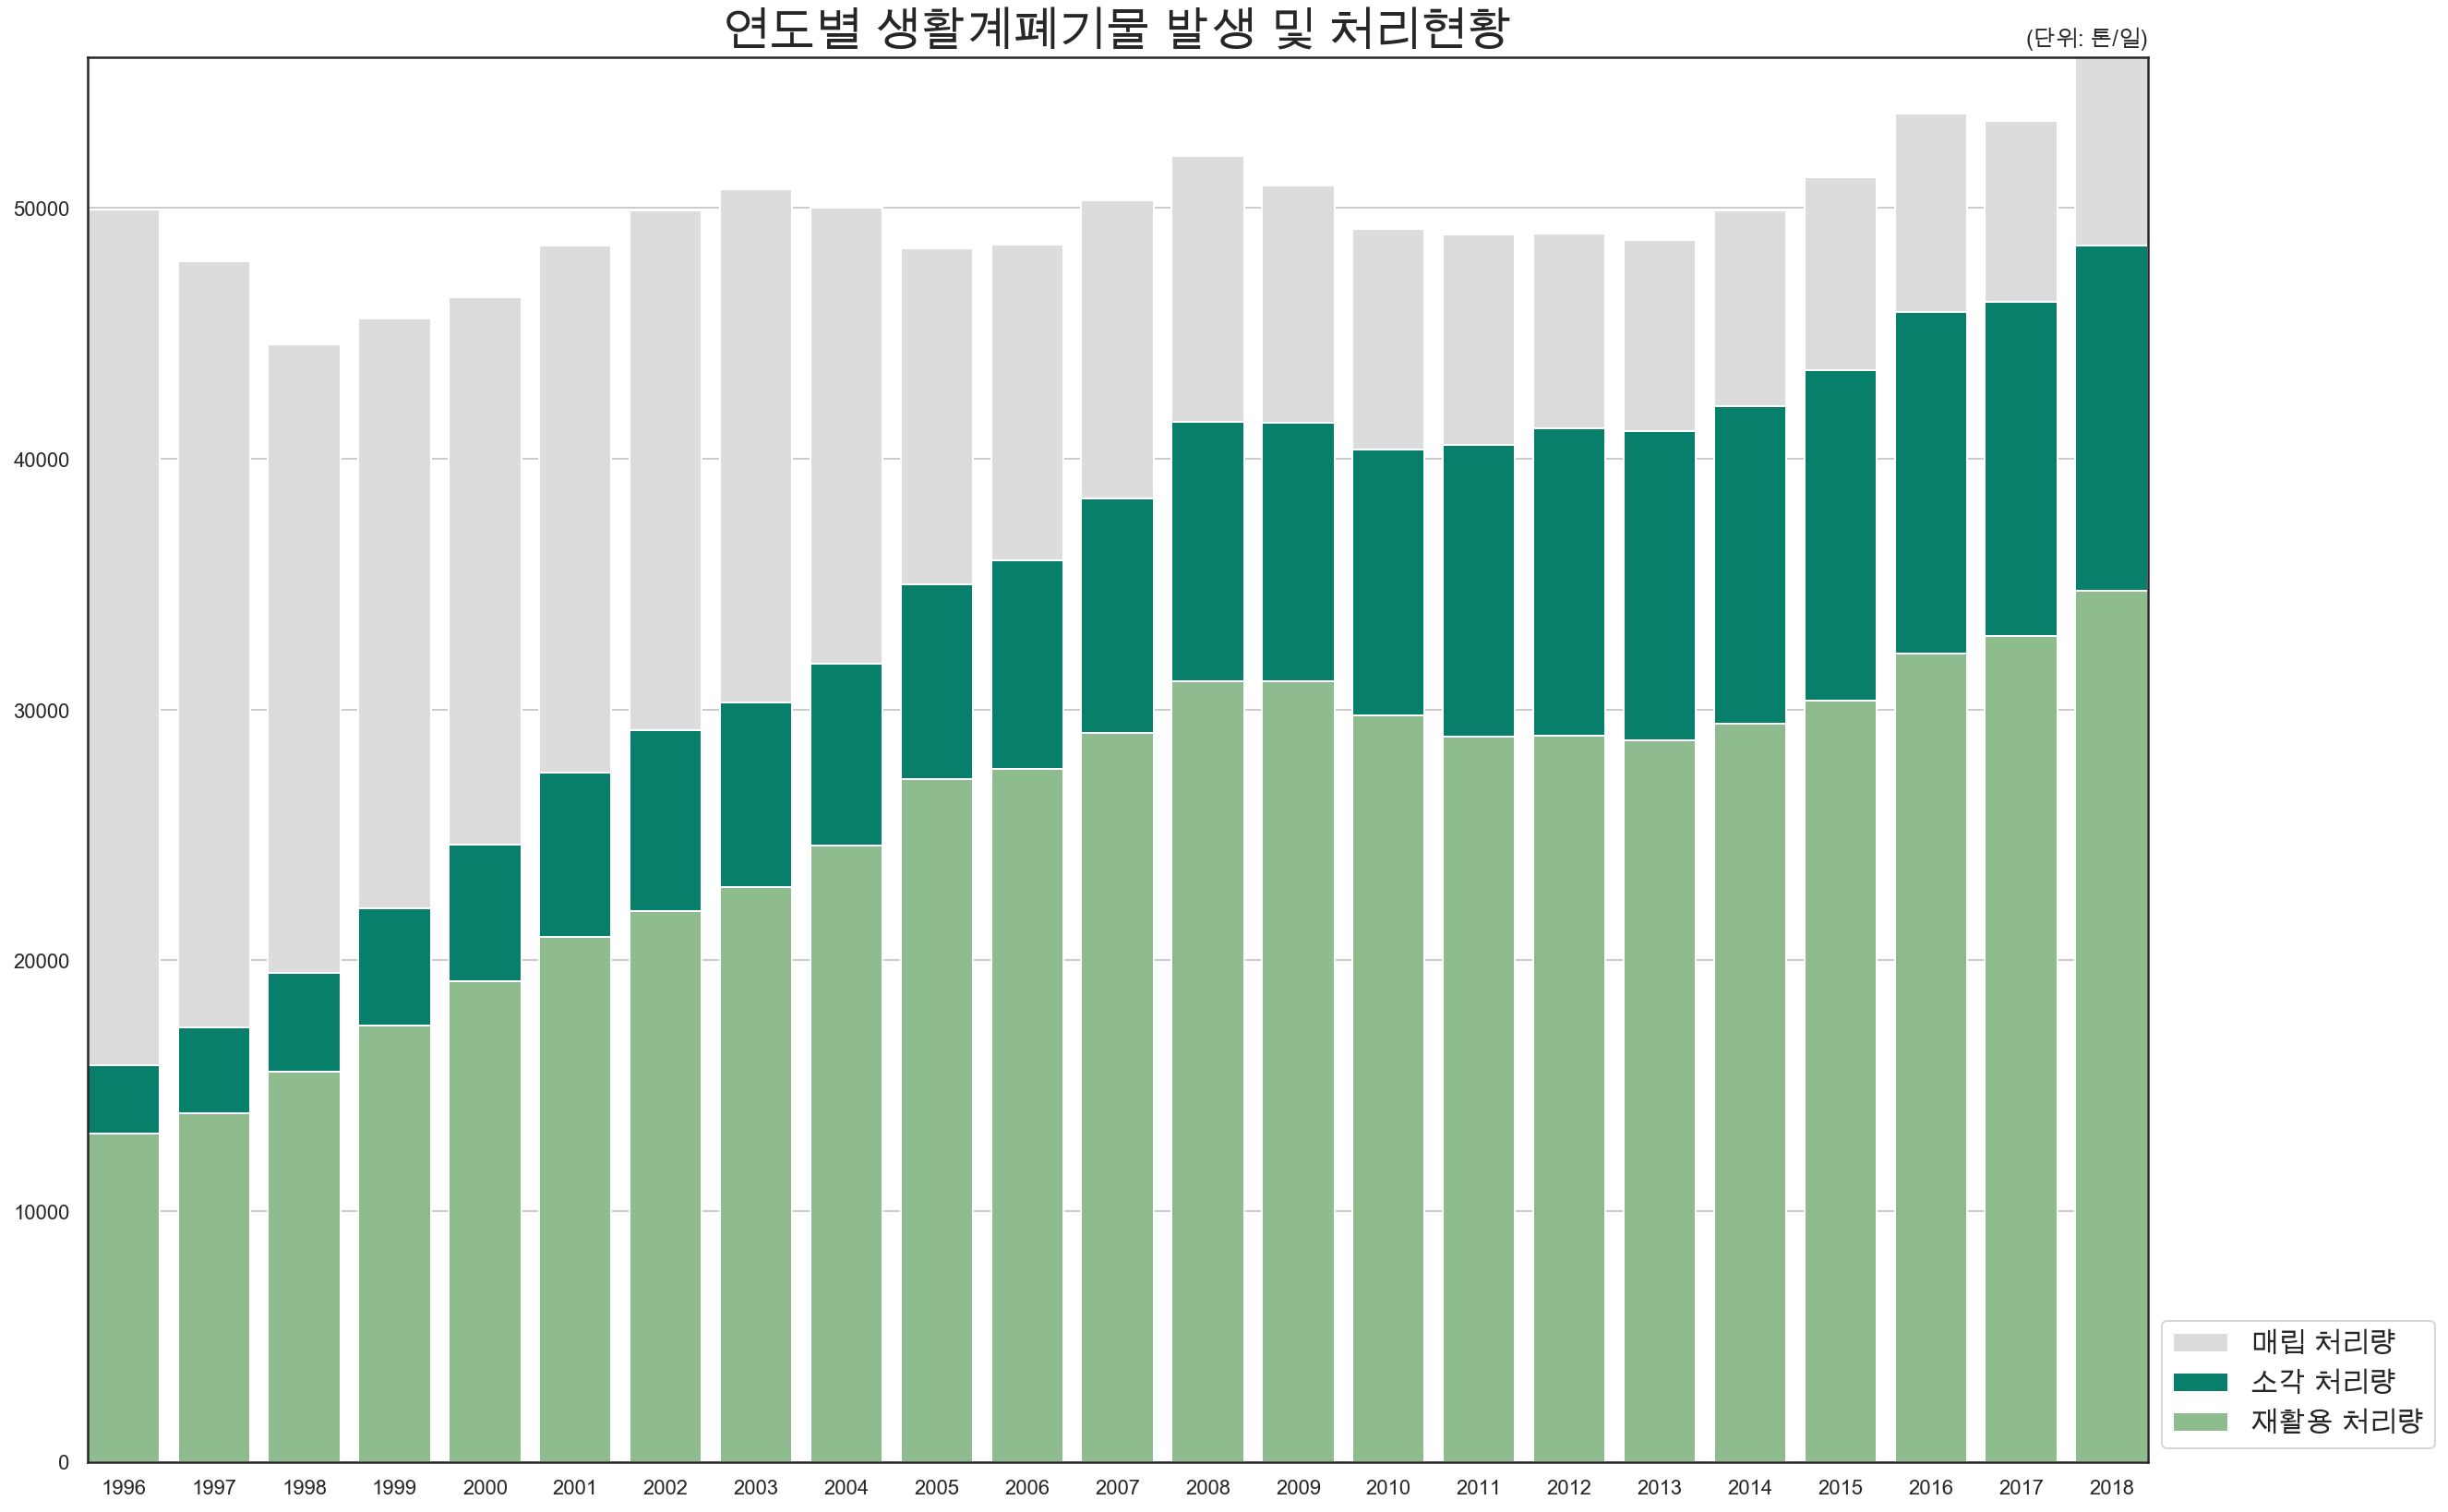

In [17]:
fig, ax = plt.subplots(figsize=(20, 14))

ax.bar(df_waste_bar.index, df_waste_bar['매립 처리량'], bottom=df_waste_bar['재활용 처리량']+df_waste_bar['소각 처리량'], color='gainsboro')
ax.bar(df_waste_bar.index, df_waste_bar['소각 처리량'], bottom=df_waste_bar['재활용 처리량'], color='#087F6A')
ax.bar(df_waste_bar.index, df_waste_bar['재활용 처리량'], color='darkseagreen')

ax.set_title('연도별 생활계폐기물 발생 및 처리현황', fontsize=25)
ax.set_title('(단위: 톤/일)', loc='right')
ax.yaxis.grid()
ax.legend(df_waste_bar.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
ax.set_facecolor('none')
ax.margins(x=0, y=0)

plt.savefig('./image/waste_barplot.png', dpi=150, bbox_inches='tight')
plt.show()

세가지를 모두 합친 막대의 길이가 `발생량`

## 2. 생활계폐기물의 소각 처리량 변화

In [18]:
df_waste_trend = df_waste_bar.copy()

In [19]:
# 비교하기 쉽게 1996년 처리량으로 나누기

df_waste_trend["매립 처리량"]=df_waste_trend["매립 처리량"].apply(lambda x: x/df_waste_trend["매립 처리량"][0])
df_waste_trend["소각 처리량"]=df_waste_trend["소각 처리량"].apply(lambda x: x/df_waste_trend["소각 처리량"][0])
df_waste_trend["재활용 처리량"]=df_waste_trend["재활용 처리량"].apply(lambda x: x/df_waste_trend["재활용 처리량"][0])

In [20]:
df_waste_trend

매립 처리량    소각 처리량   재활용 처리량
연도                                
1996  1.000000  1.000000  1.000000
1997  0.896320  1.251009  1.062875
1998  0.734957  1.447009  1.189643
1999  0.690145  1.715780  1.329334
2000  0.639918  1.996367  1.464806
2001  0.615560  2.413321  1.598987
2002  0.607464  2.652954  1.677415
2003  0.599435  2.696624  1.753084
2004  0.533337  2.651119  1.879148
2005  0.392829  2.845248  2.082097
2006  0.369376  3.053468  2.111001
2007  0.348304  3.430385  2.222330
2008  0.310280  3.797651  2.379767
2009  0.277609  3.783046  2.378873
2010  0.257867  3.893138  2.273887
2011  0.245958  4.258532  2.211676
2012  0.227981  4.499486  2.212601
2013  0.223168  4.525064  2.199830
2014  0.229018  4.641284  2.251058
2015  0.226263  4.835046  2.319689
2016  0.231835  4.994422  2.464951
2017  0.212220  4.887376  2.516806
2018  0.220585  5.050606  2.655572

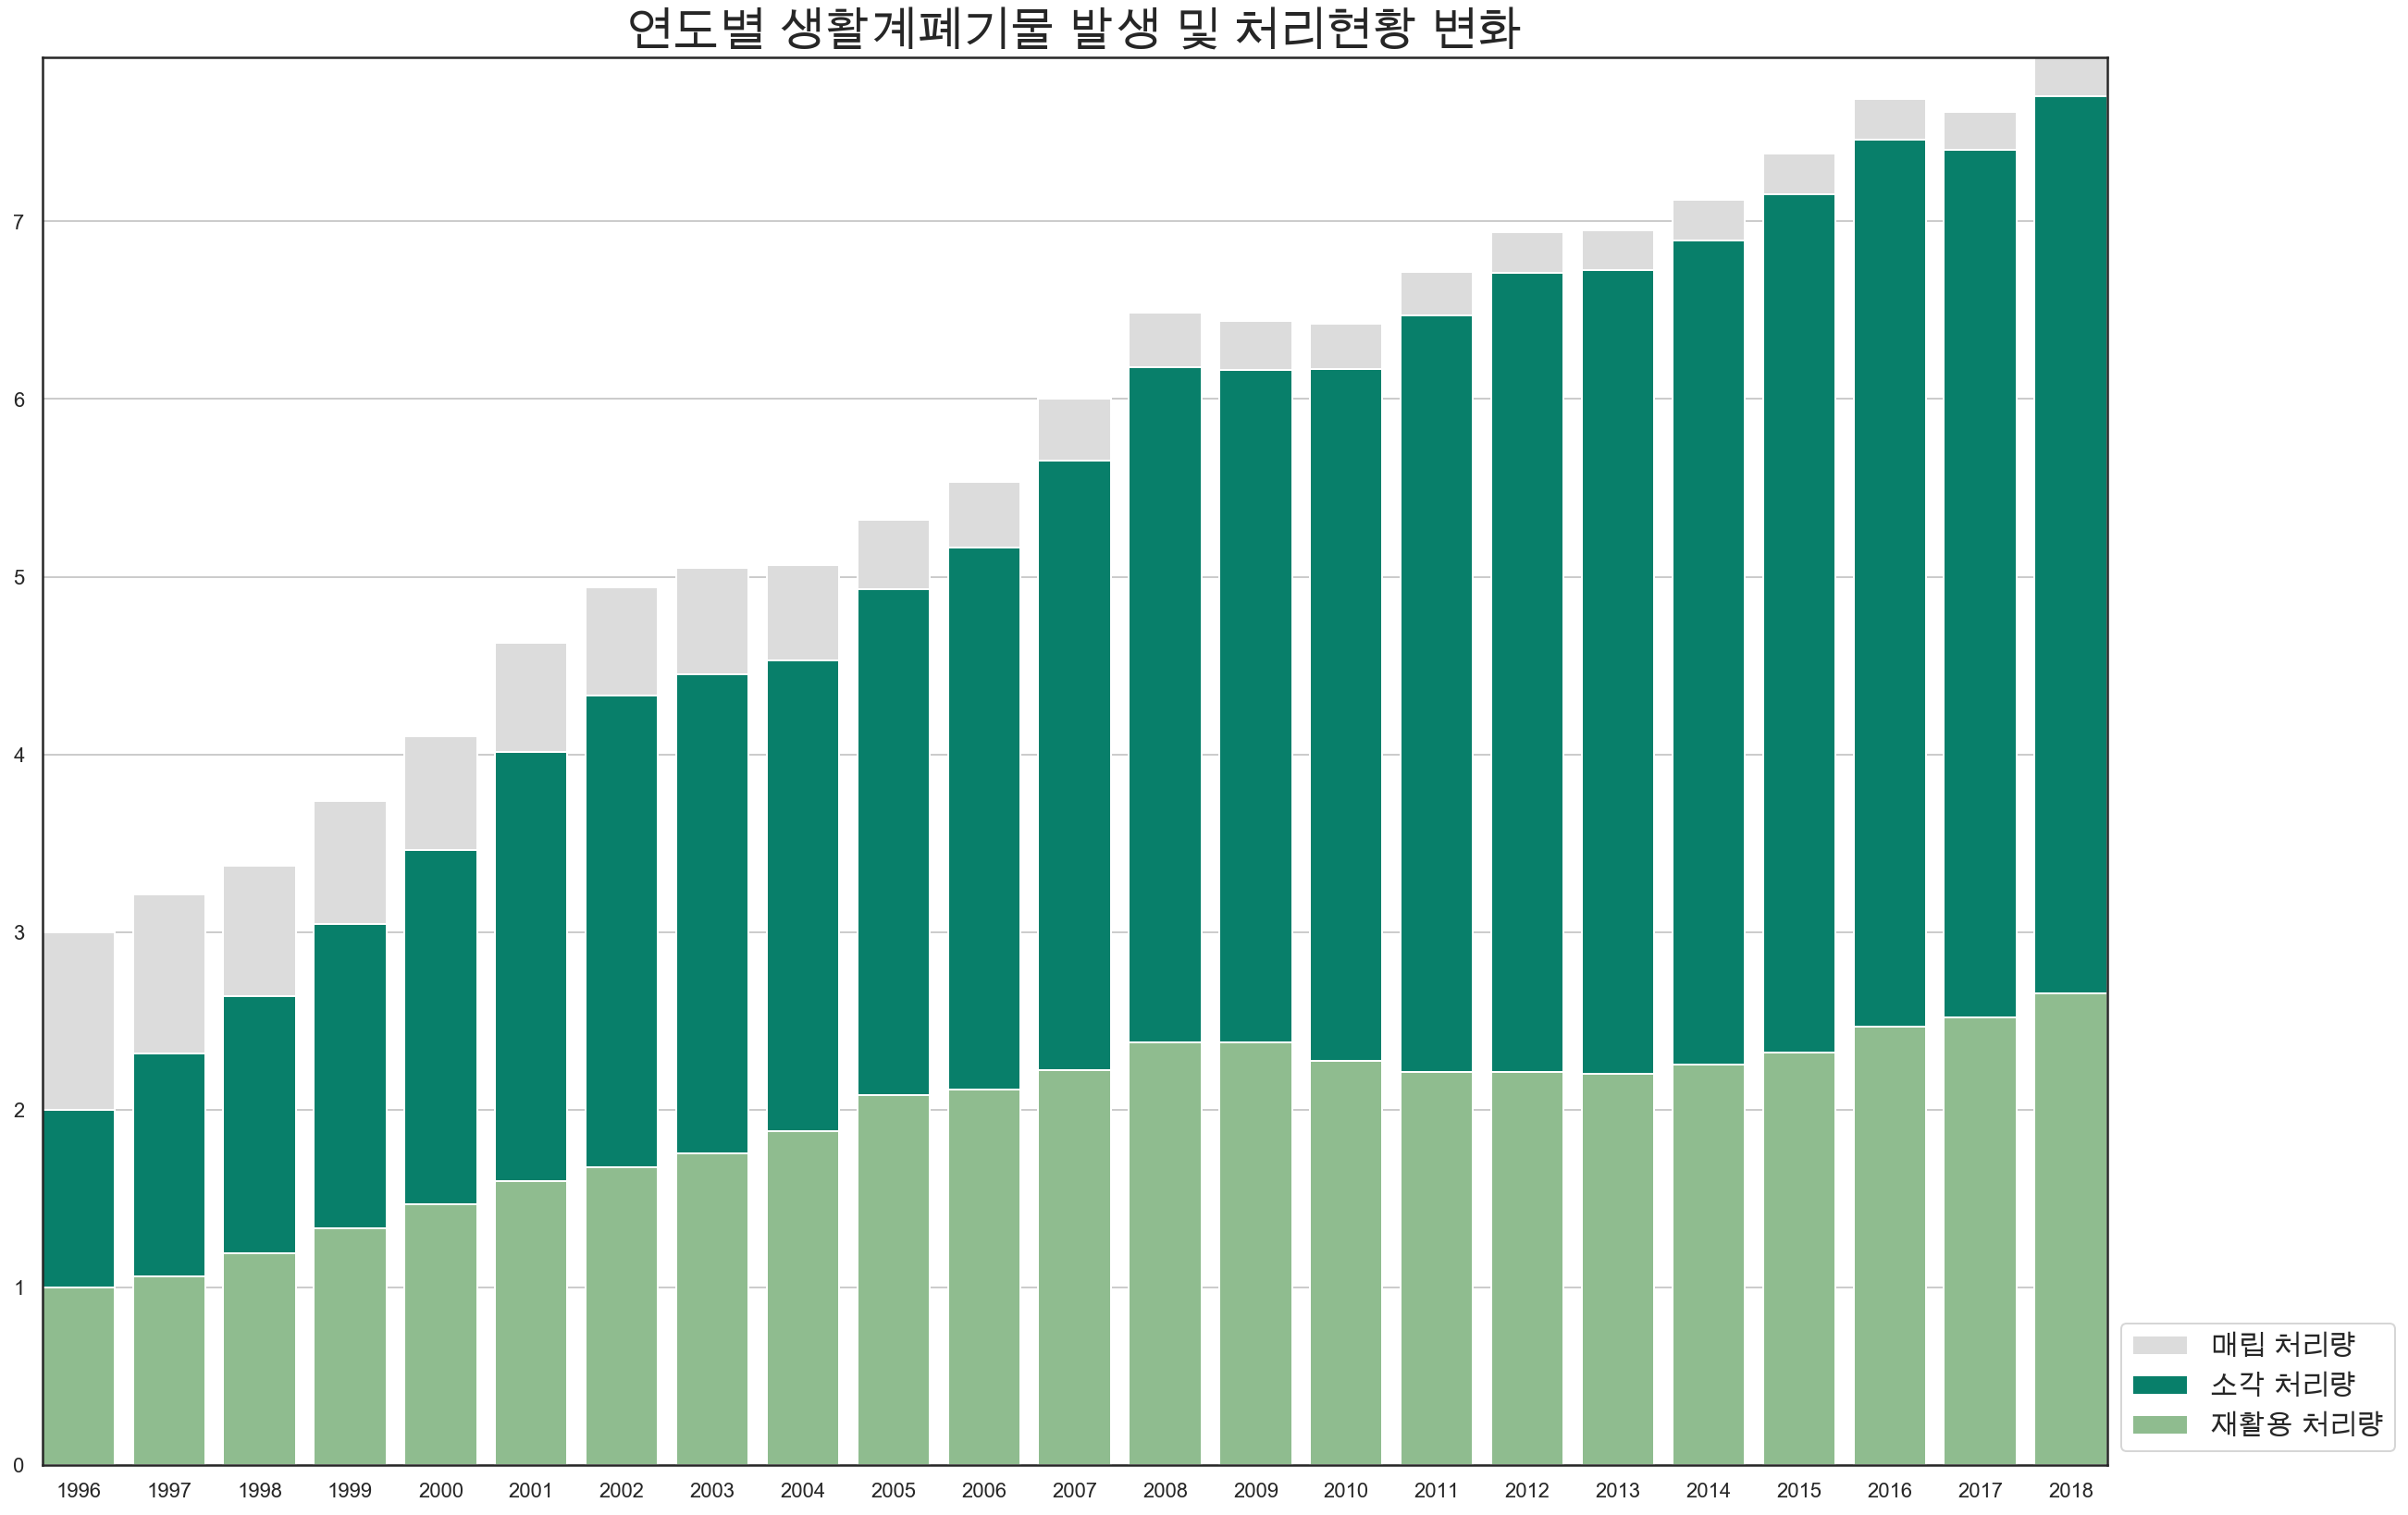

In [21]:
fig = plt.subplots(figsize=(20, 14))
ax = plt.axes()        

ax.bar(df_waste_trend.index, df_waste_trend['매립 처리량'], bottom=df_waste_trend['재활용 처리량']+df_waste_trend['소각 처리량'], color='gainsboro')
ax.bar(df_waste_trend.index, df_waste_trend['소각 처리량'], bottom=df_waste_trend['재활용 처리량'], color='#087F6A')
ax.bar(df_waste_trend.index, df_waste_trend['재활용 처리량'], color='darkseagreen')

ax.set_title('연도별 생활계폐기물 발생 및 처리현황 변화', fontsize=25)
# ax.set_title('(단위: 톤/일)', loc='right')
ax.yaxis.grid()
ax.legend(df_waste_trend.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
ax.set_facecolor('none')
ax.margins(x=0, y=0)

plt.savefig('./image/waste_barplot_2.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. 소각 폐기물 연도별 종류별 순위

In [22]:
df_waste_total.tail()

연도      발생량  매립 처리량  소각 처리량  재활용 처리량  기타 처리량
가구류     2018    670.1     0.0     0.0    670.1     0.0
폐식용유    2018     58.7     0.0     0.0     58.7     0.0
재활용잔재물  2018   1546.5     0.0     0.0   1546.5     0.0
기타      2018   1052.1     0.0     0.0   1052.1     0.0
음식물류    2018  14477.2   140.6   297.0  14039.6     0.0

In [23]:
# 연도 형변환
df_waste_total['연도'] = df_waste_total['연도'].apply(pd.to_numeric, errors='coerce')

In [24]:
# 연도별 소각 처리량 데이터만 추출
incineration = pd.pivot_table(df_waste_total, index=df_waste_total.index, values=['소각 처리량'], columns=['연도'])
incineration.columns = incineration.columns.droplevel([0])
incineration.tail(10)

연도            1996    1997    1998    1999    2000    2001    2002    2003  \
종이류(가연성)     994.7  1036.4  1212.6  1474.1  1749.2  2047.9  2231.9  2248.7   
총계          2725.0  3409.0  3943.1  4675.5  5440.1  6576.3  7229.3  7348.3   
캔류             0.0     0.0     0.1     0.0     0.0     0.0     1.2     1.5   
타이어            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
토사류(불연성)       0.0     2.8     3.2     0.1     0.3     0.2     0.4     2.4   
폐식용유           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
플라스틱류         13.1    12.9    17.1     9.1    15.1     8.8    12.8    16.3   
플라스틱류(가연성)   229.2   352.9   402.5   580.4   652.2   779.5   969.0   931.3   
합성수지류          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
형광등            NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

연도            2004    2005  ...     2009     2010     2011     2012     2013  \
종이류(가연성)    2425.8  2623.8  ...   3125.2   3139.8   3351.3   3707.2   3823.6   
총계          7224.3  7753.3  ...  10308.8  10608.8  11604.5  12261.1  12330.8   
캔류             3.2     0.8  ...      0.0      0.0      0.0      0.0      0.0   
타이어            NaN     NaN  ...      0.0      0.0      0.0      0.0      0.0   
토사류(불연성)       0.0     0.3  ...     20.6     14.7     18.8     23.9     83.0   
폐식용유           NaN     NaN  ...      NaN      0.0      0.0      0.0      0.0   
플라스틱류         10.8    12.2  ...      0.0      0.0      0.0      0.0      0.0   
플라스틱류(가연성)  1020.9  1172.4  ...   1575.0   1562.3   1690.4   2001.4   1999.8   
합성수지류          NaN     NaN  ...      0.0      0.0      0.0      0.0      0.0   
형광등            NaN     NaN  ...      0.0      0.0      0.0      0.0      0.0   

연도             2014     2015     2016     2017     2018  
종이류(가연성)     3852.6   3827.6   3935.3   3608.1   3519.0  
총계          12647.5  13175.5  13609.8  13318.1  13762.9  
캔류              0.0      0.0      0.0      0.0      NaN  
타이어             0.0      0.0      0.0      0.0      0.0  
토사류(불연성)       60.1     44.6    101.5     77.7     38.3  
폐식용유            0.0      0.0      0.0      0.0      0.0  
플라스틱류           0.0      0.0      0.0      0.0      0.0  
플라스틱류(가연성)   2130.4   2318.8   2473.8   2571.4   2896.0  
합성수지류           0.0      0.0      0.0      0.0      0.0  
형광등             0.0      0.0      0.0      0.0      0.0  

[10 rows x 23 columns]

In [25]:
# 총계, 소계(소계) 인덱스 삭제
incineration.drop(['총계', '소계(소계)'], inplace=True)

In [26]:
# 인덱스명 수정
incineration.rename(index={'소계(기타(배출불명 등))':'기타(배출불명 등)'}, inplace=True)

### 3-1. bar plot (연도별 구분)

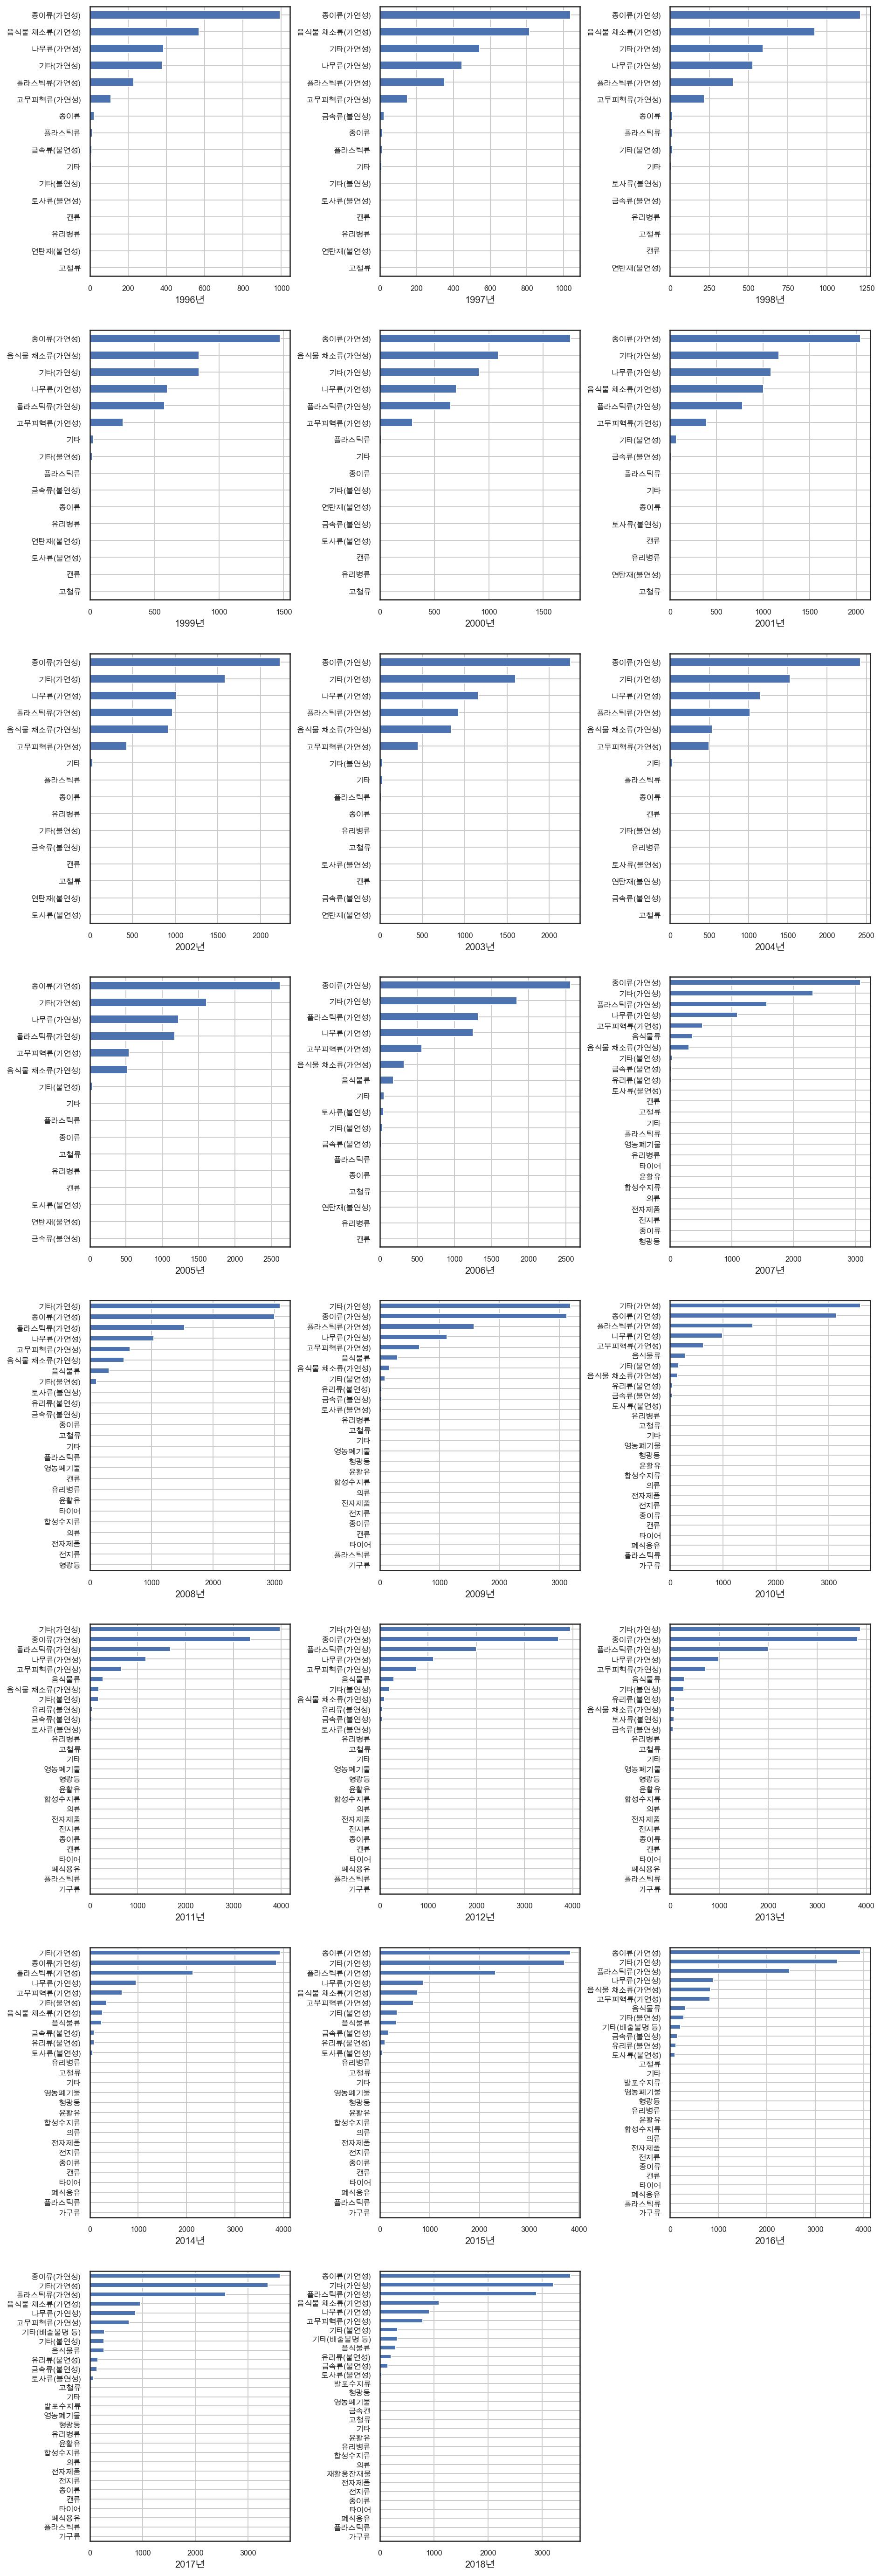

In [27]:
num = 1

for i in range(1996, 2019):
    plt.subplot(8, 3, num)
    incineration[i].dropna().sort_values().plot(
        kind='barh', grid=True, figsize=(15, 50), fontsize=8)
    plt.xlabel(str(i)+'년', fontsize=10)
    num += 1

plt.subplots_adjust(wspace=0.45)
plt.savefig('./image/incineration_year_bar.png', dpi=150, bbox_inches='tight')
plt.show()

### 3-2. line plot

In [28]:
# 전치 및 인덱스 형변환
incineration_t = incineration.T
incineration_t.index = incineration_t.index.astype(str)

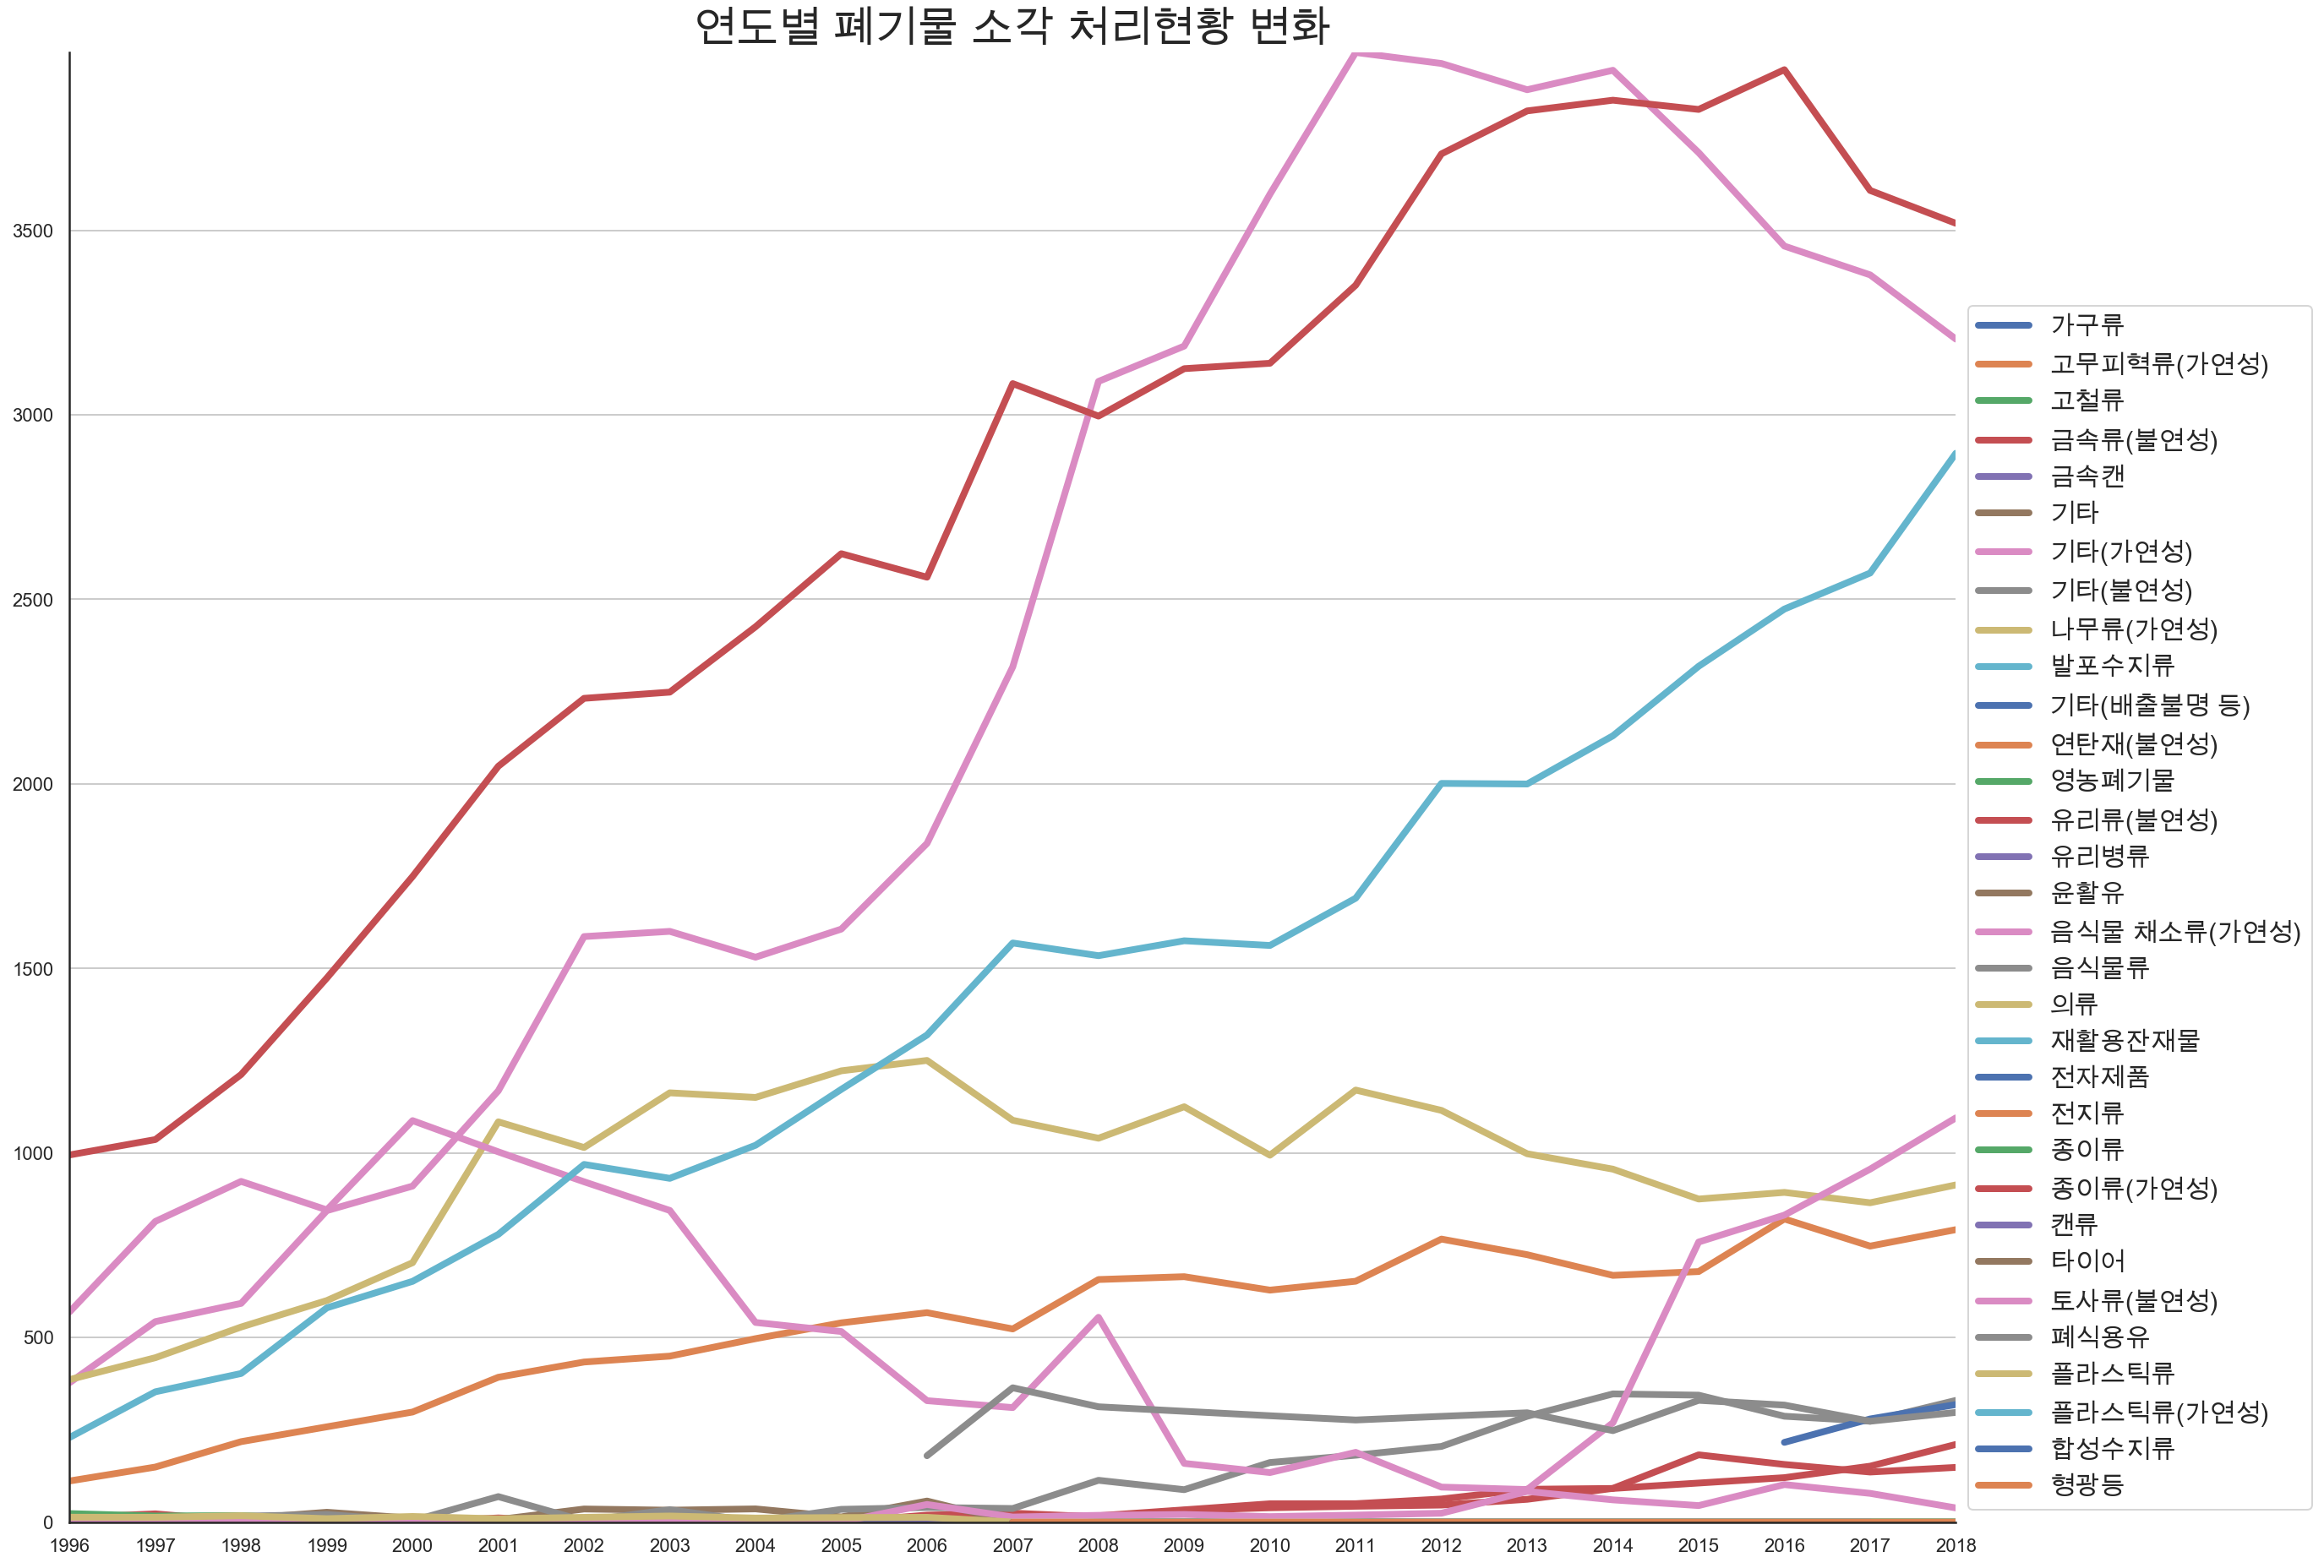

In [29]:
# 분류 전체 대상 line plot

fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(incineration_t.index, incineration_t.values, linewidth=4)
plt.legend(incineration_t.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 소각 처리현황 변화', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.show()

In [30]:
# 상위권 분류만 추출
incineration_7 = incineration_t[['음식물 채소류(가연성)', '음식물류', '종이류(가연성)', '종이류', '플라스틱류(가연성)', '플라스틱류', '금속류(불연성)', '나무류(가연성)', '고무피혁류(가연성)', '유리류(불연성)']]
incineration_7.fillna(value=0, inplace=True)
incineration_7.head()

/Users/mieyhgnaj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


음식물 채소류(가연성)  음식물류  종이류(가연성)   종이류  플라스틱류(가연성)  플라스틱류  금속류(불연성)  \
연도                                                                      
1996         569.5   0.0     994.7  22.9       229.2   13.1      12.0   
1997         814.6   0.0    1036.4  16.3       352.9   12.9      22.2   
1998         923.0   0.0    1212.6  17.5       402.5   17.1       2.5   
1999         845.8   0.0    1474.1   5.2       580.4    9.1       8.6   
2000        1087.7   0.0    1749.2   9.7       652.2   15.1       0.5   

      나무류(가연성)  고무피혁류(가연성)  유리류(불연성)  
연도                                    
1996     386.0       111.3       0.0  
1997     445.3       149.0       0.0  
1998     528.4       217.8       0.0  
1999     600.2       258.0       0.0  
2000     702.7       298.1       0.0

In [31]:
incineration7 = incineration_7.copy()

In [32]:
# 종이류 + 종이류(가연성), 금속캔 + 캔류, 음식물 채소류(가연성) + 음식물류, 플라스틱류(가연성) + 플라스틱류

incineration7['종이류'] = incineration7['종이류']+incineration7['종이류(가연성)']
incineration7['음식물류'] = incineration7['음식물류']+incineration7['음식물 채소류(가연성)']
incineration7['플라스틱류'] = incineration7['플라스틱류']+incineration7['플라스틱류(가연성)']
incineration7.drop(['종이류(가연성)', '음식물 채소류(가연성)',
               '플라스틱류(가연성)'], axis=1, inplace=True)
incineration7.head()

음식물류     종이류  플라스틱류  금속류(불연성)  나무류(가연성)  고무피혁류(가연성)  유리류(불연성)
연도                                                                   
1996   569.5  1017.6  242.3      12.0     386.0       111.3       0.0
1997   814.6  1052.7  365.8      22.2     445.3       149.0       0.0
1998   923.0  1230.1  419.6       2.5     528.4       217.8       0.0
1999   845.8  1479.3  589.5       8.6     600.2       258.0       0.0
2000  1087.7  1758.9  667.3       0.5     702.7       298.1       0.0

In [33]:
# 컬럼명 보기 쉽게 수정
incineration7.columns = ['음식물류', '종이류', '플라스틱류', '금속류', '나무류', '고무피혁류', '유리류']
incineration7.head()

음식물류     종이류  플라스틱류   금속류    나무류  고무피혁류  유리류
연도                                                  
1996   569.5  1017.6  242.3  12.0  386.0  111.3  0.0
1997   814.6  1052.7  365.8  22.2  445.3  149.0  0.0
1998   923.0  1230.1  419.6   2.5  528.4  217.8  0.0
1999   845.8  1479.3  589.5   8.6  600.2  258.0  0.0
2000  1087.7  1758.9  667.3   0.5  702.7  298.1  0.0

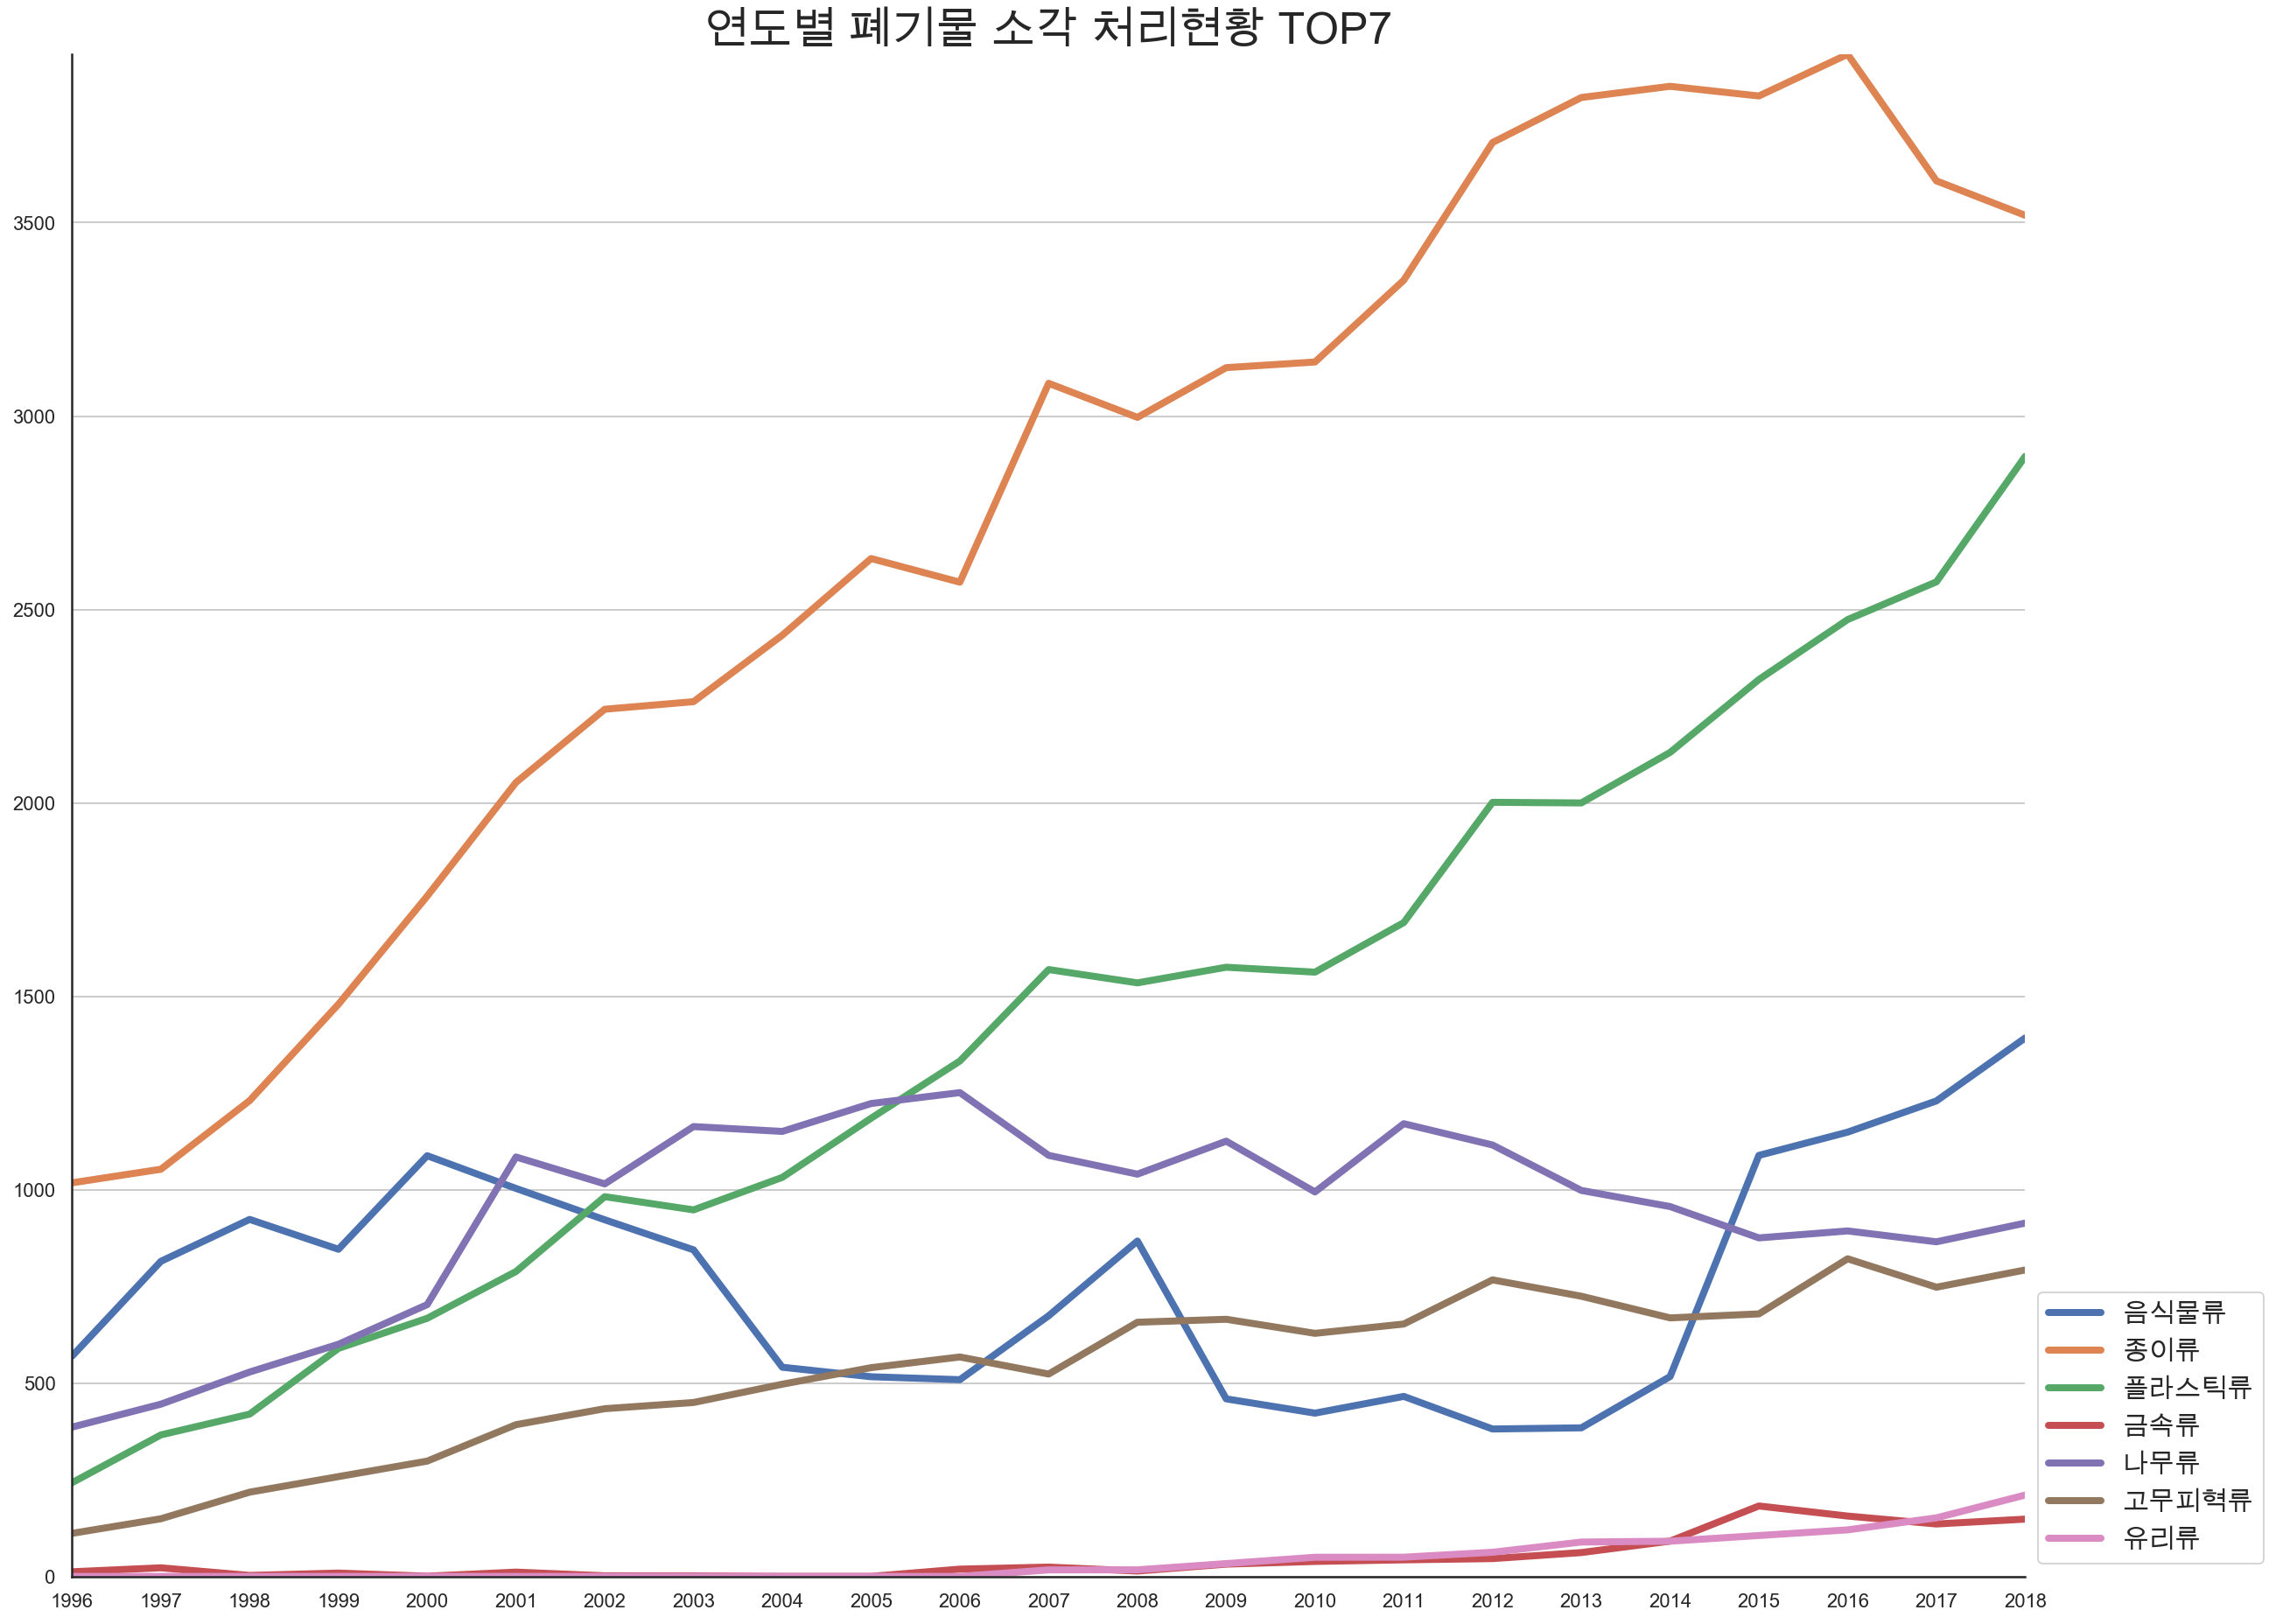

In [34]:
fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(incineration7.index, incineration7.values, linewidth=4)
plt.legend(incineration7.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 소각 처리현황 TOP7', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.savefig('./image/incineration7.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. 매립 폐기물 연도별 종류별 순위

In [35]:
df_waste_total.tail()

연도      발생량  매립 처리량  소각 처리량  재활용 처리량  기타 처리량
가구류     2018    670.1     0.0     0.0    670.1     0.0
폐식용유    2018     58.7     0.0     0.0     58.7     0.0
재활용잔재물  2018   1546.5     0.0     0.0   1546.5     0.0
기타      2018   1052.1     0.0     0.0   1052.1     0.0
음식물류    2018  14477.2   140.6   297.0  14039.6     0.0

In [36]:
# 연도 형변환
df_waste_total['연도'] = df_waste_total['연도'].apply(pd.to_numeric, errors='coerce')

In [37]:
# 연도별 매립 처리량 데이터만 추출
landfill = pd.pivot_table(df_waste_total, index=df_waste_total.index, values=['매립 처리량'], columns=['연도'])
landfill.columns = landfill.columns.droplevel([0])
landfill.tail(10)

연도             1996     1997     1998     1999     2000     2001     2002  \
종이류(가연성)     5276.5   4946.9   4257.7   4178.4   3707.6   3592.8   3313.9   
총계          34115.6  30578.5  25073.5  23544.7  21831.2  21000.2  20724.0   
캔류              3.0     13.9     10.5      9.9      8.9     15.1      6.0   
타이어             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
토사류(불연성)     1372.0   1559.5   1130.1    995.9   1070.2   1033.2   1018.0   
폐식용유            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
플라스틱류          12.5     16.2     15.4     14.7     24.7     22.7     32.6   
플라스틱류(가연성)   1907.6   1861.2   1624.1   1719.7   1671.1   1660.0   1670.1   
합성수지류           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
형광등             NaN      NaN      NaN      NaN      NaN      NaN      NaN   

연도             2003     2004     2005  ...    2009    2010    2011    2012  \
종이류(가연성)     3298.1   3252.4   2758.0  ...  1692.4  1562.4  1532.9  1473.8   
총계          20450.1  18195.1  13401.6  ...  9470.8  8797.3  8391.0  7777.7   
캔류              4.5     11.1      4.3  ...     0.0     0.0     0.0     0.0   
타이어             NaN      NaN      NaN  ...     0.0     0.0     0.0     0.0   
토사류(불연성)     1072.7    925.4    872.5  ...   600.0   650.9   779.7   559.5   
폐식용유            NaN      NaN      NaN  ...     NaN     0.0     0.0     0.0   
플라스틱류          36.1     40.1     14.8  ...     0.0     0.0     0.0     0.0   
플라스틱류(가연성)   1615.9   1582.8   1278.5  ...  1012.9   956.5   866.2   825.2   
합성수지류           NaN      NaN      NaN  ...     0.0     0.0     0.0     0.0   
형광등             NaN      NaN      NaN  ...     0.0     0.0     0.0     0.0   

연도            2013    2014    2015    2016    2017    2018  
종이류(가연성)    1437.2  1258.0  1296.9  1391.3  1120.5  1173.0  
총계          7613.5  7813.1  7719.1  7909.2  7240.0  7525.4  
캔류             0.0     0.0     0.0     0.0     0.0     NaN  
타이어            0.0     0.0     0.0     0.0     0.0     0.0  
토사류(불연성)     584.1   618.9   474.1   600.2   347.5   486.4  
폐식용유           0.0     0.0     0.0     0.0     0.0     0.0  
플라스틱류          0.0     0.0     0.0     0.0     0.0     0.0  
플라스틱류(가연성)   824.8   826.4   891.2   901.6   898.6   934.1  
합성수지류          0.0     0.0     0.0     0.0     0.0     0.0  
형광등            0.0     0.0     0.0     0.0     0.0     0.0  

[10 rows x 23 columns]

In [38]:
# 총계, 소계(소계) 인덱스 삭제
landfill.drop(['총계', '소계(소계)'], inplace=True)

In [39]:
# 인덱스명 수정
landfill.rename(index={'소계(기타(배출불명 등))':'기타(배출불명 등)'}, inplace=True)

### 4-1. bar plot (연도별 구분)

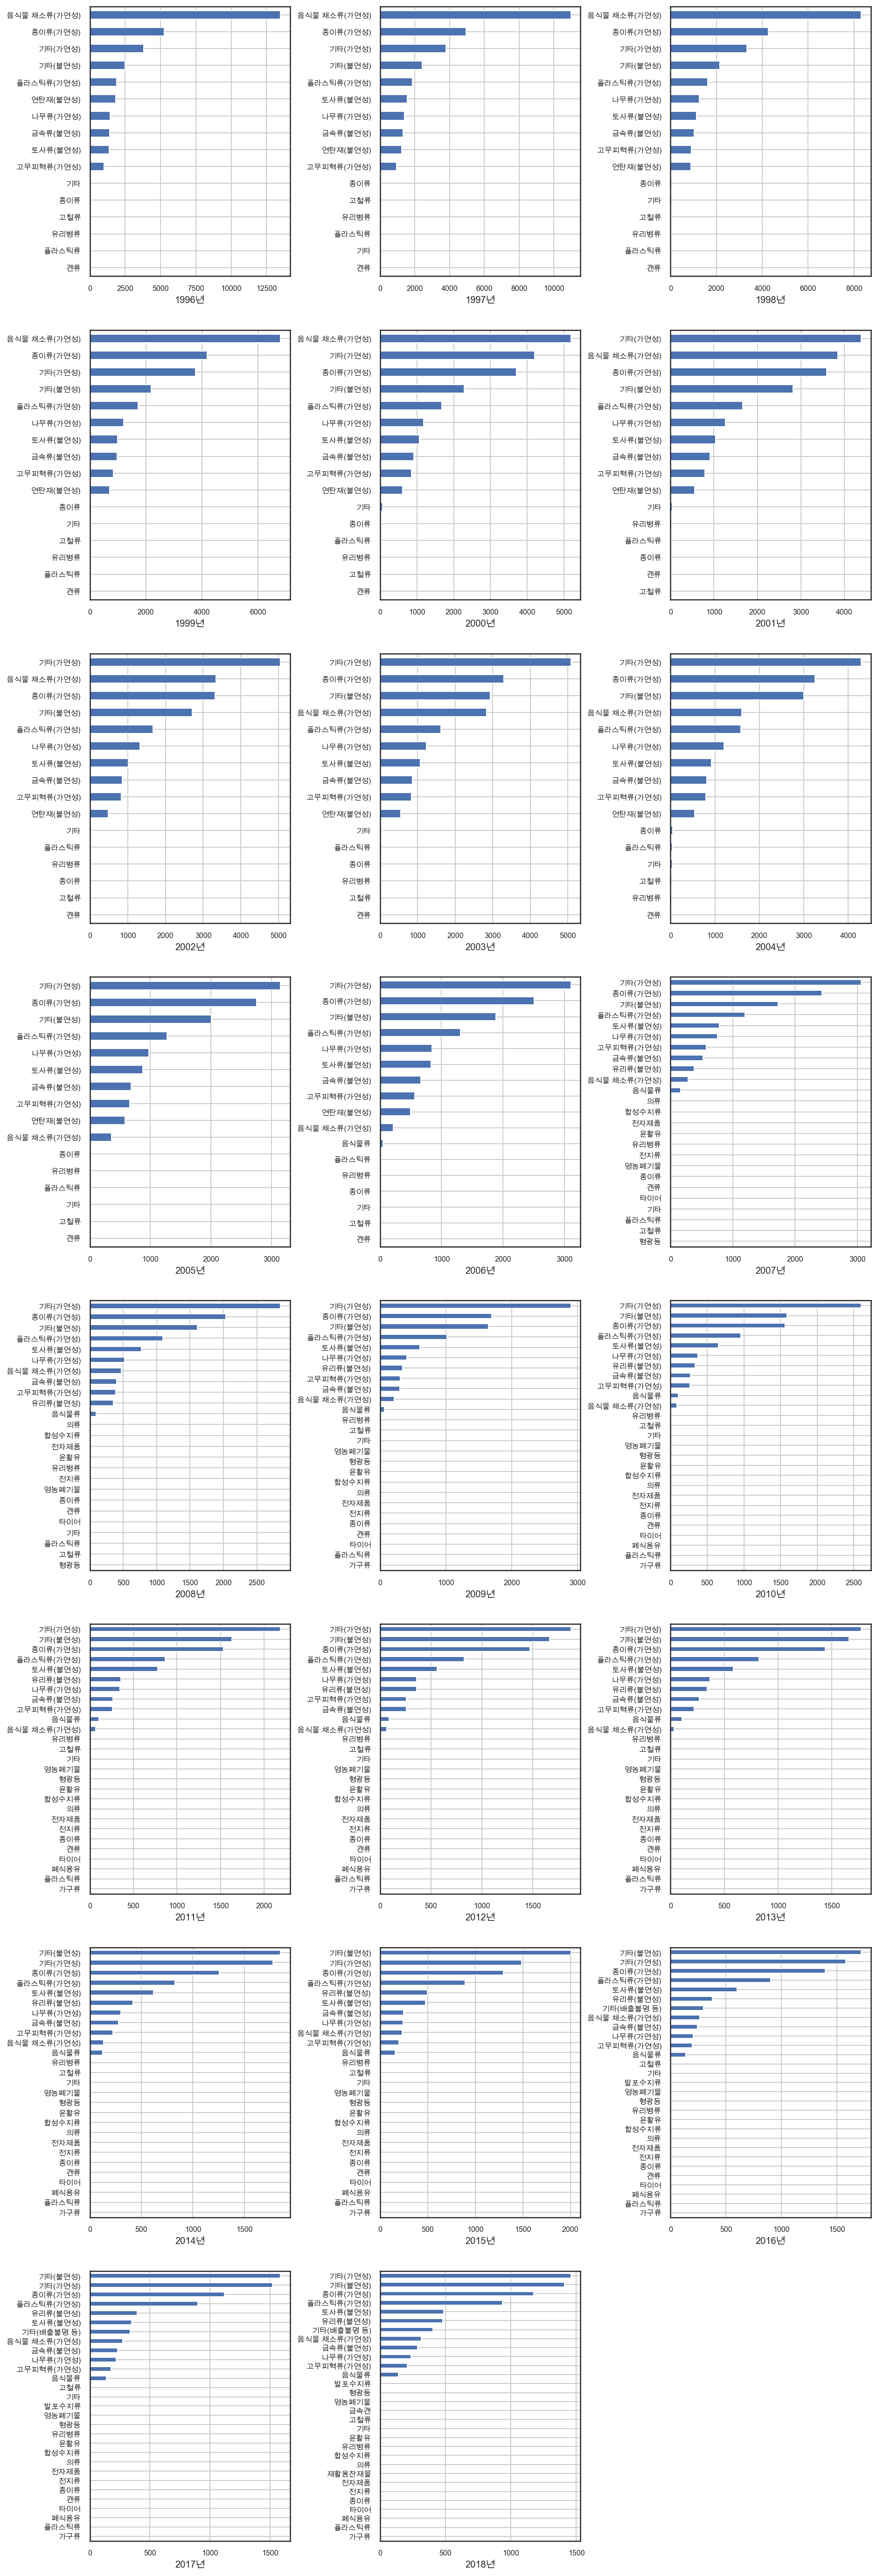

In [40]:
num = 1

for i in range(1996, 2019):
    plt.subplot(8, 3, num)
    landfill[i].dropna().sort_values().plot(
        kind='barh', grid=True, figsize=(15, 50), fontsize=8)
    plt.xlabel(str(i)+'년', fontsize=10)
    num += 1

plt.subplots_adjust(wspace=0.45)
plt.savefig('./image/landfill_year_bar.png', dpi=150, bbox_inches='tight')
plt.show()

### 4-2. line plot

In [41]:
# 전치 및 인덱스 형변환
landfill_t = landfill.T
landfill_t.index = landfill_t.index.astype(str)

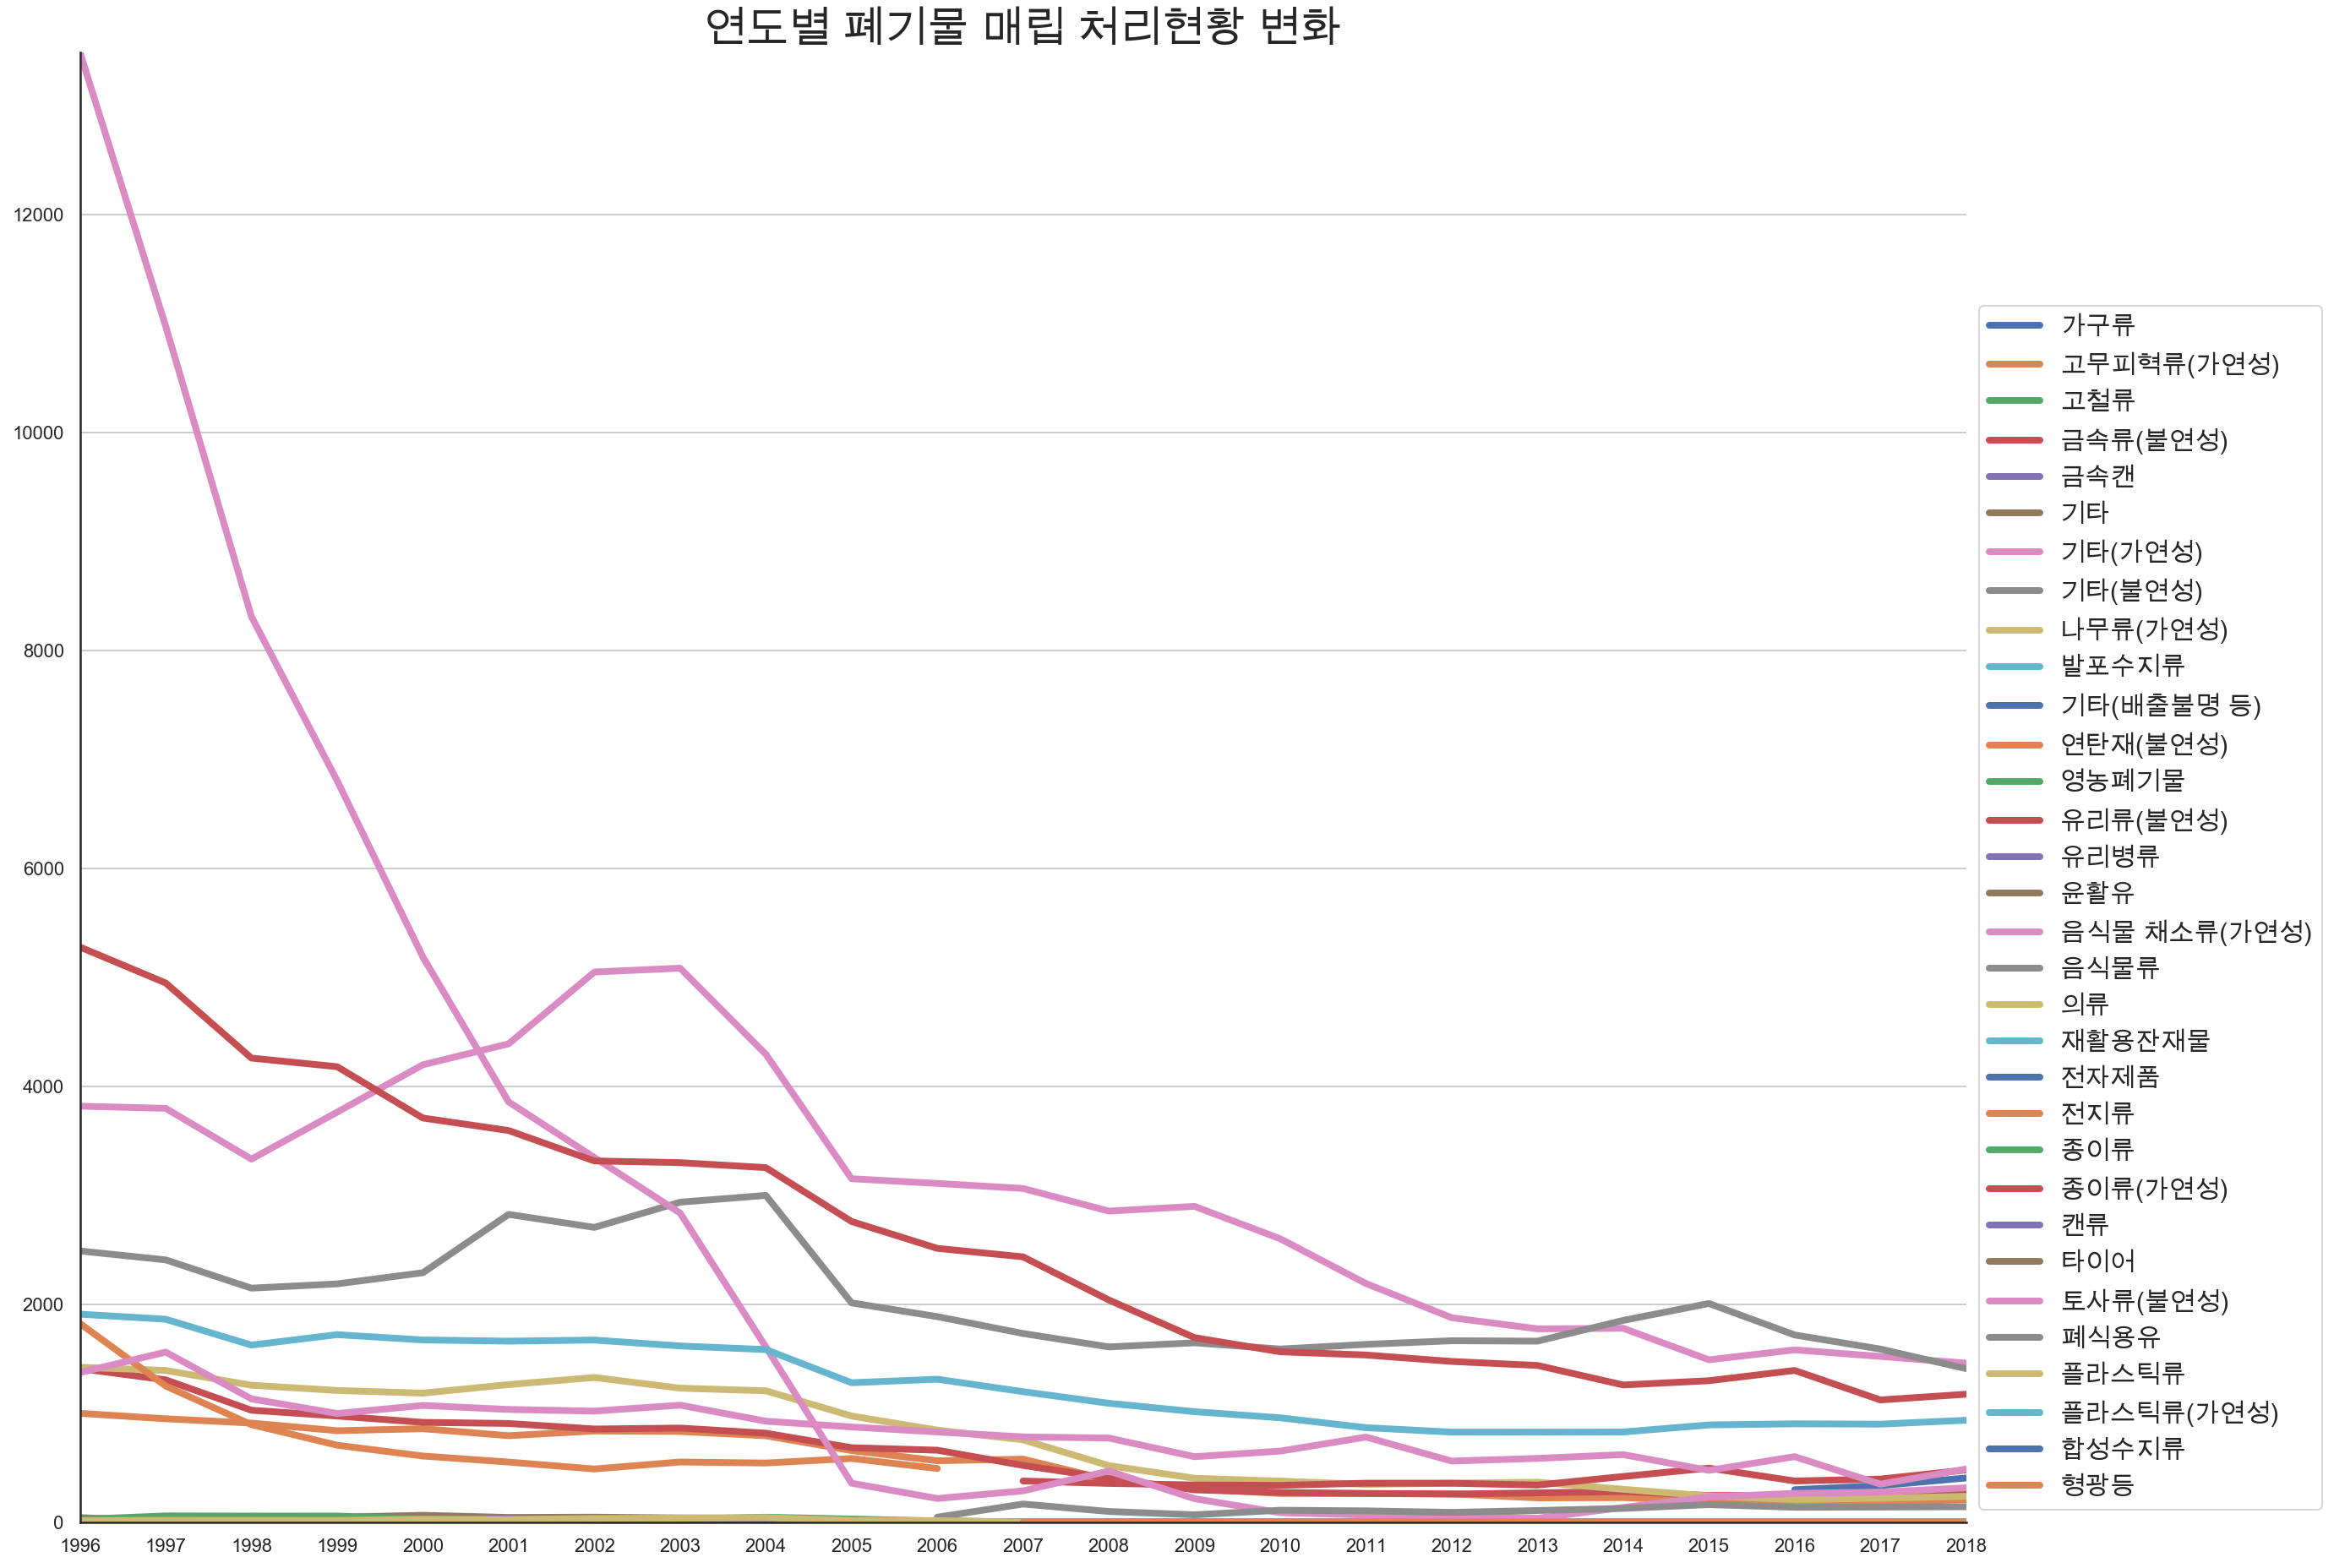

In [42]:
# 분류 전체 대상 line plot

fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(landfill_t.index, landfill_t.values, linewidth=4)
plt.legend(landfill_t.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 매립 처리현황 변화', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.show()

In [43]:
# 상위권 분류만 추출
landfill_7 = landfill_t[['음식물 채소류(가연성)', '음식물류', '종이류(가연성)', '종이류', '플라스틱류(가연성)', '플라스틱류', '금속류(불연성)', '나무류(가연성)', '고무피혁류(가연성)', '유리류(불연성)']]
landfill_7.fillna(value=0, inplace=True)
landfill_7.head()

/Users/mieyhgnaj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


음식물 채소류(가연성)  음식물류  종이류(가연성)   종이류  플라스틱류(가연성)  플라스틱류  금속류(불연성)  \
연도                                                                      
1996       13486.4   0.0    5276.5  24.1      1907.6   12.5    1408.2   
1997       10973.5   0.0    4946.9  56.5      1861.2   16.2    1304.7   
1998        8308.9   0.0    4257.7  54.9      1624.1   15.4    1026.1   
1999        6802.8   0.0    4178.4  55.3      1719.7   14.7     973.0   
2000        5185.4   0.0    3707.6  27.8      1671.1   24.7     914.7   

      나무류(가연성)  고무피혁류(가연성)  유리류(불연성)  
연도                                    
1996    1420.7       997.6       0.0  
1997    1391.3       947.8       0.0  
1998    1255.5       908.2       0.0  
1999    1207.5       838.3       0.0  
2000    1183.0       856.6       0.0

In [44]:
landfill7 = landfill_7.copy()

In [45]:
# 종이류 + 종이류(가연성), 음식물 채소류(가연성) + 음식물류, 플라스틱류(가연성) + 플라스틱류

landfill7['종이류'] = landfill7['종이류']+landfill7['종이류(가연성)']
landfill7['음식물류'] = landfill7['음식물류']+landfill7['음식물 채소류(가연성)']
landfill7['플라스틱류'] = landfill7['플라스틱류']+landfill7['플라스틱류(가연성)']
landfill7.drop(['종이류(가연성)', '음식물 채소류(가연성)',
                '플라스틱류(가연성)'], axis=1, inplace=True)
landfill7.head()

음식물류     종이류   플라스틱류  금속류(불연성)  나무류(가연성)  고무피혁류(가연성)  유리류(불연성)
연도                                                                     
1996  13486.4  5300.6  1920.1    1408.2    1420.7       997.6       0.0
1997  10973.5  5003.4  1877.4    1304.7    1391.3       947.8       0.0
1998   8308.9  4312.6  1639.5    1026.1    1255.5       908.2       0.0
1999   6802.8  4233.7  1734.4     973.0    1207.5       838.3       0.0
2000   5185.4  3735.4  1695.8     914.7    1183.0       856.6       0.0

In [46]:
# 컬럼명 보기 쉽게 수정
landfill7.columns = ['음식물류', '종이류', '플라스틱류', '연탄재', '나무류', '토사류', '금속류']
landfill7.head()

음식물류     종이류   플라스틱류     연탄재     나무류    토사류  금속류
연도                                                       
1996  13486.4  5300.6  1920.1  1408.2  1420.7  997.6  0.0
1997  10973.5  5003.4  1877.4  1304.7  1391.3  947.8  0.0
1998   8308.9  4312.6  1639.5  1026.1  1255.5  908.2  0.0
1999   6802.8  4233.7  1734.4   973.0  1207.5  838.3  0.0
2000   5185.4  3735.4  1695.8   914.7  1183.0  856.6  0.0

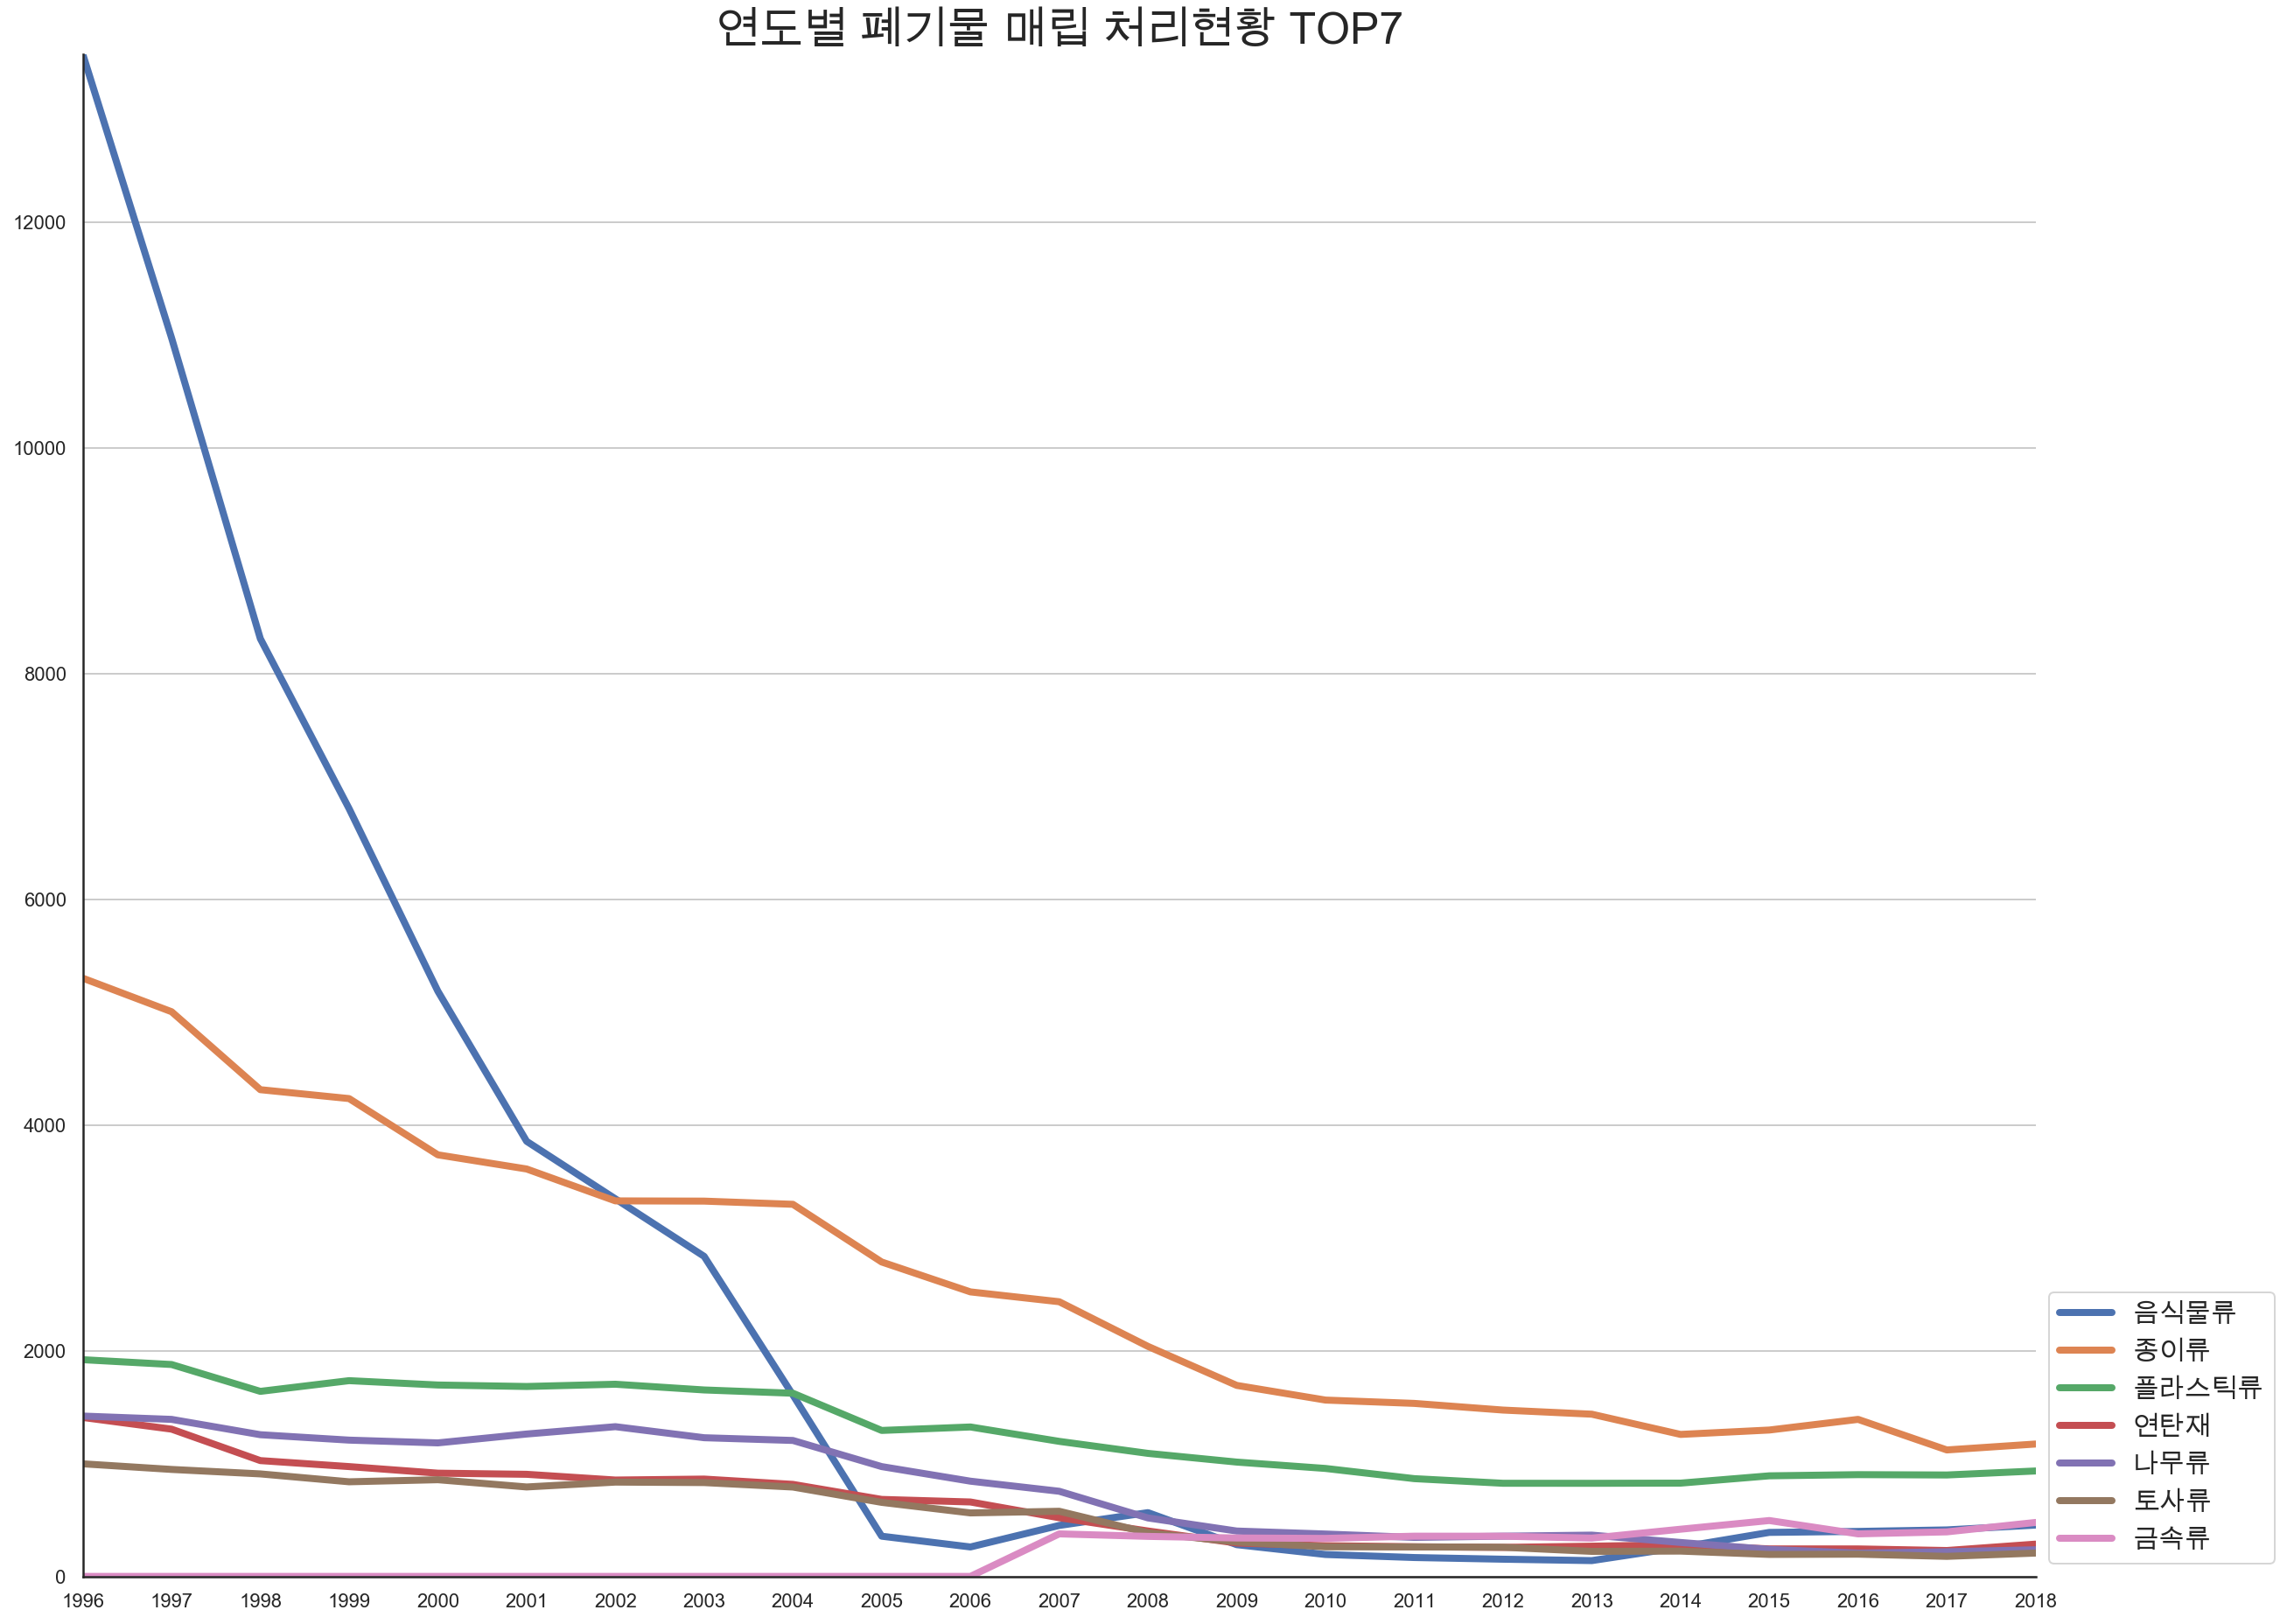

In [47]:
fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(landfill7.index, landfill7.values, linewidth=4)
plt.legend(landfill7.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 매립 처리현황 TOP7', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.savefig('./image/landfill7.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. 재활용 폐기물 연도별 종류별 순위

In [48]:
df_waste_total.tail()

연도      발생량  매립 처리량  소각 처리량  재활용 처리량  기타 처리량
가구류     2018    670.1     0.0     0.0    670.1     0.0
폐식용유    2018     58.7     0.0     0.0     58.7     0.0
재활용잔재물  2018   1546.5     0.0     0.0   1546.5     0.0
기타      2018   1052.1     0.0     0.0   1052.1     0.0
음식물류    2018  14477.2   140.6   297.0  14039.6     0.0

In [49]:
# 연도 형변환
df_waste_total['연도'] = df_waste_total['연도'].apply(pd.to_numeric, errors='coerce')

In [50]:
# 연도별 재활용 처리량 데이터만 추출
recycle = pd.pivot_table(df_waste_total, index=df_waste_total.index, values=['재활용 처리량'], columns=['연도'])
recycle.columns = recycle.columns.droplevel([0])
recycle.tail(10)

연도             1996     1997     1998     1999     2000     2001     2002  \
종이류(가연성)      108.5     73.7    149.7    133.1    120.1    105.1     94.7   
총계          13084.6  13907.3  15566.0  17393.8  19166.4  20922.1  21948.3   
캔류            535.2    607.2    690.3    633.9    615.2    618.4    678.6   
타이어             NaN      NaN      NaN      NaN      NaN      NaN      NaN   
토사류(불연성)       38.1     17.2     10.3     26.9     25.0     22.7     14.9   
폐식용유            NaN      NaN      NaN      NaN      NaN      NaN      NaN   
플라스틱류         724.0    726.4    868.2    964.9   1058.0   1194.3   1267.5   
플라스틱류(가연성)     29.6     31.2     48.0     31.2     36.1     41.8     53.2   
합성수지류           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
형광등             NaN      NaN      NaN      NaN      NaN      NaN      NaN   

연도             2003     2004     2005  ...     2009     2010     2011  \
종이류(가연성)       76.8     56.9     91.3  ...     97.7     80.8     55.6   
총계          22938.4  24587.9  27243.4  ...  31126.6  29752.9  28938.9   
캔류            663.1    750.5    754.7  ...    727.5    792.4    734.7   
타이어             NaN      NaN      NaN  ...    162.1     48.6     40.9   
토사류(불연성)       26.3    102.2     29.8  ...    252.6    257.9    138.8   
폐식용유            NaN      NaN      NaN  ...      NaN     57.4     60.6   
플라스틱류        1298.3   1393.4   1561.2  ...   1452.0   1350.1   1305.3   
플라스틱류(가연성)     58.5     38.2     39.1  ...    228.8    121.8     87.8   
합성수지류           NaN      NaN      NaN  ...    883.9    883.9   1033.1   
형광등             NaN      NaN      NaN  ...     35.5    142.0     84.6   

연도             2012     2013     2014     2015     2016     2017     2018  
종이류(가연성)       66.1    121.9    299.8    320.0    304.9    465.3    492.9  
총계          28951.0  28783.9  29454.2  30352.2  32252.9  32931.4  34747.1  
캔류            730.1    682.7    713.8    748.9    765.1    670.8      NaN  
타이어            31.4     24.5     33.4     24.8     29.3     46.5     79.0  
토사류(불연성)      154.1    238.5    238.0    182.1    279.1    216.1    406.2  
폐식용유           27.3     30.2     48.2     33.8     79.5     62.2     58.7  
플라스틱류        1377.5   1238.9   1236.8   1453.9   1133.2   1251.4   1490.7  
플라스틱류(가연성)    183.4    301.9    413.2    528.7    937.0   1130.9   1054.3  
합성수지류        1266.6   1335.2   1430.6   1199.9   1709.5   2168.5   2315.0  
형광등            54.0     60.4    152.5     54.8    183.2    149.1     91.4  

[10 rows x 23 columns]

In [51]:
# 총계, 소계(소계) 인덱스 삭제
recycle.drop(['총계', '소계(소계)'], inplace=True)

### 5-1. bar plot (연도별 구분)

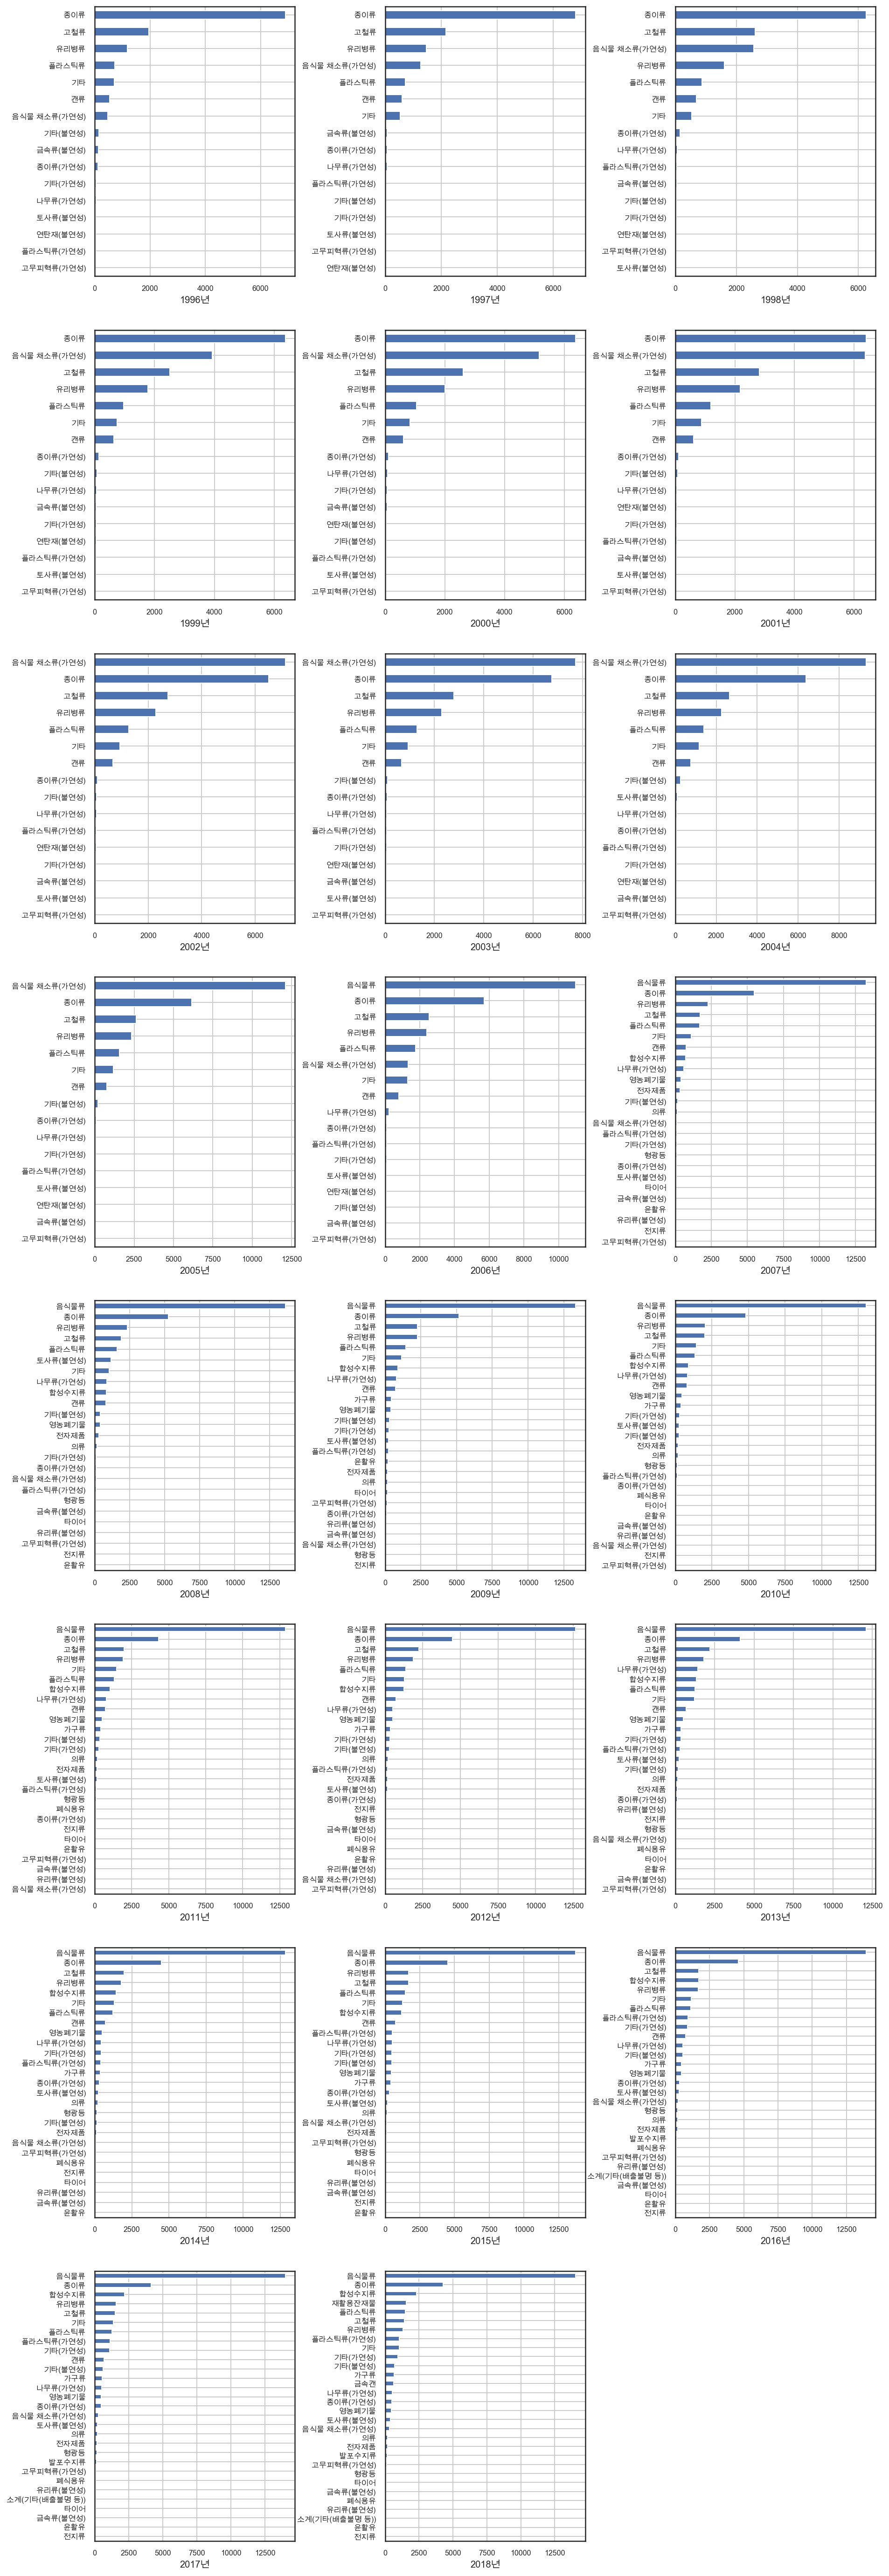

In [52]:
num = 1

for i in range(1996, 2019):
    plt.subplot(8, 3, num)
    recycle[i].dropna().sort_values().plot(
        kind='barh', grid=True, figsize=(15, 50), fontsize=8)
    plt.xlabel(str(i)+'년', fontsize=10)
    num += 1

plt.subplots_adjust(wspace=0.45)
plt.savefig('./image/recycle_year_bar.png', dpi=150, bbox_inches='tight')
plt.show()

### 5-2. line plot

In [53]:
# 전치 및 인덱스 형변환
recycle_t = recycle.T
recycle_t.index = recycle_t.index.astype(str)

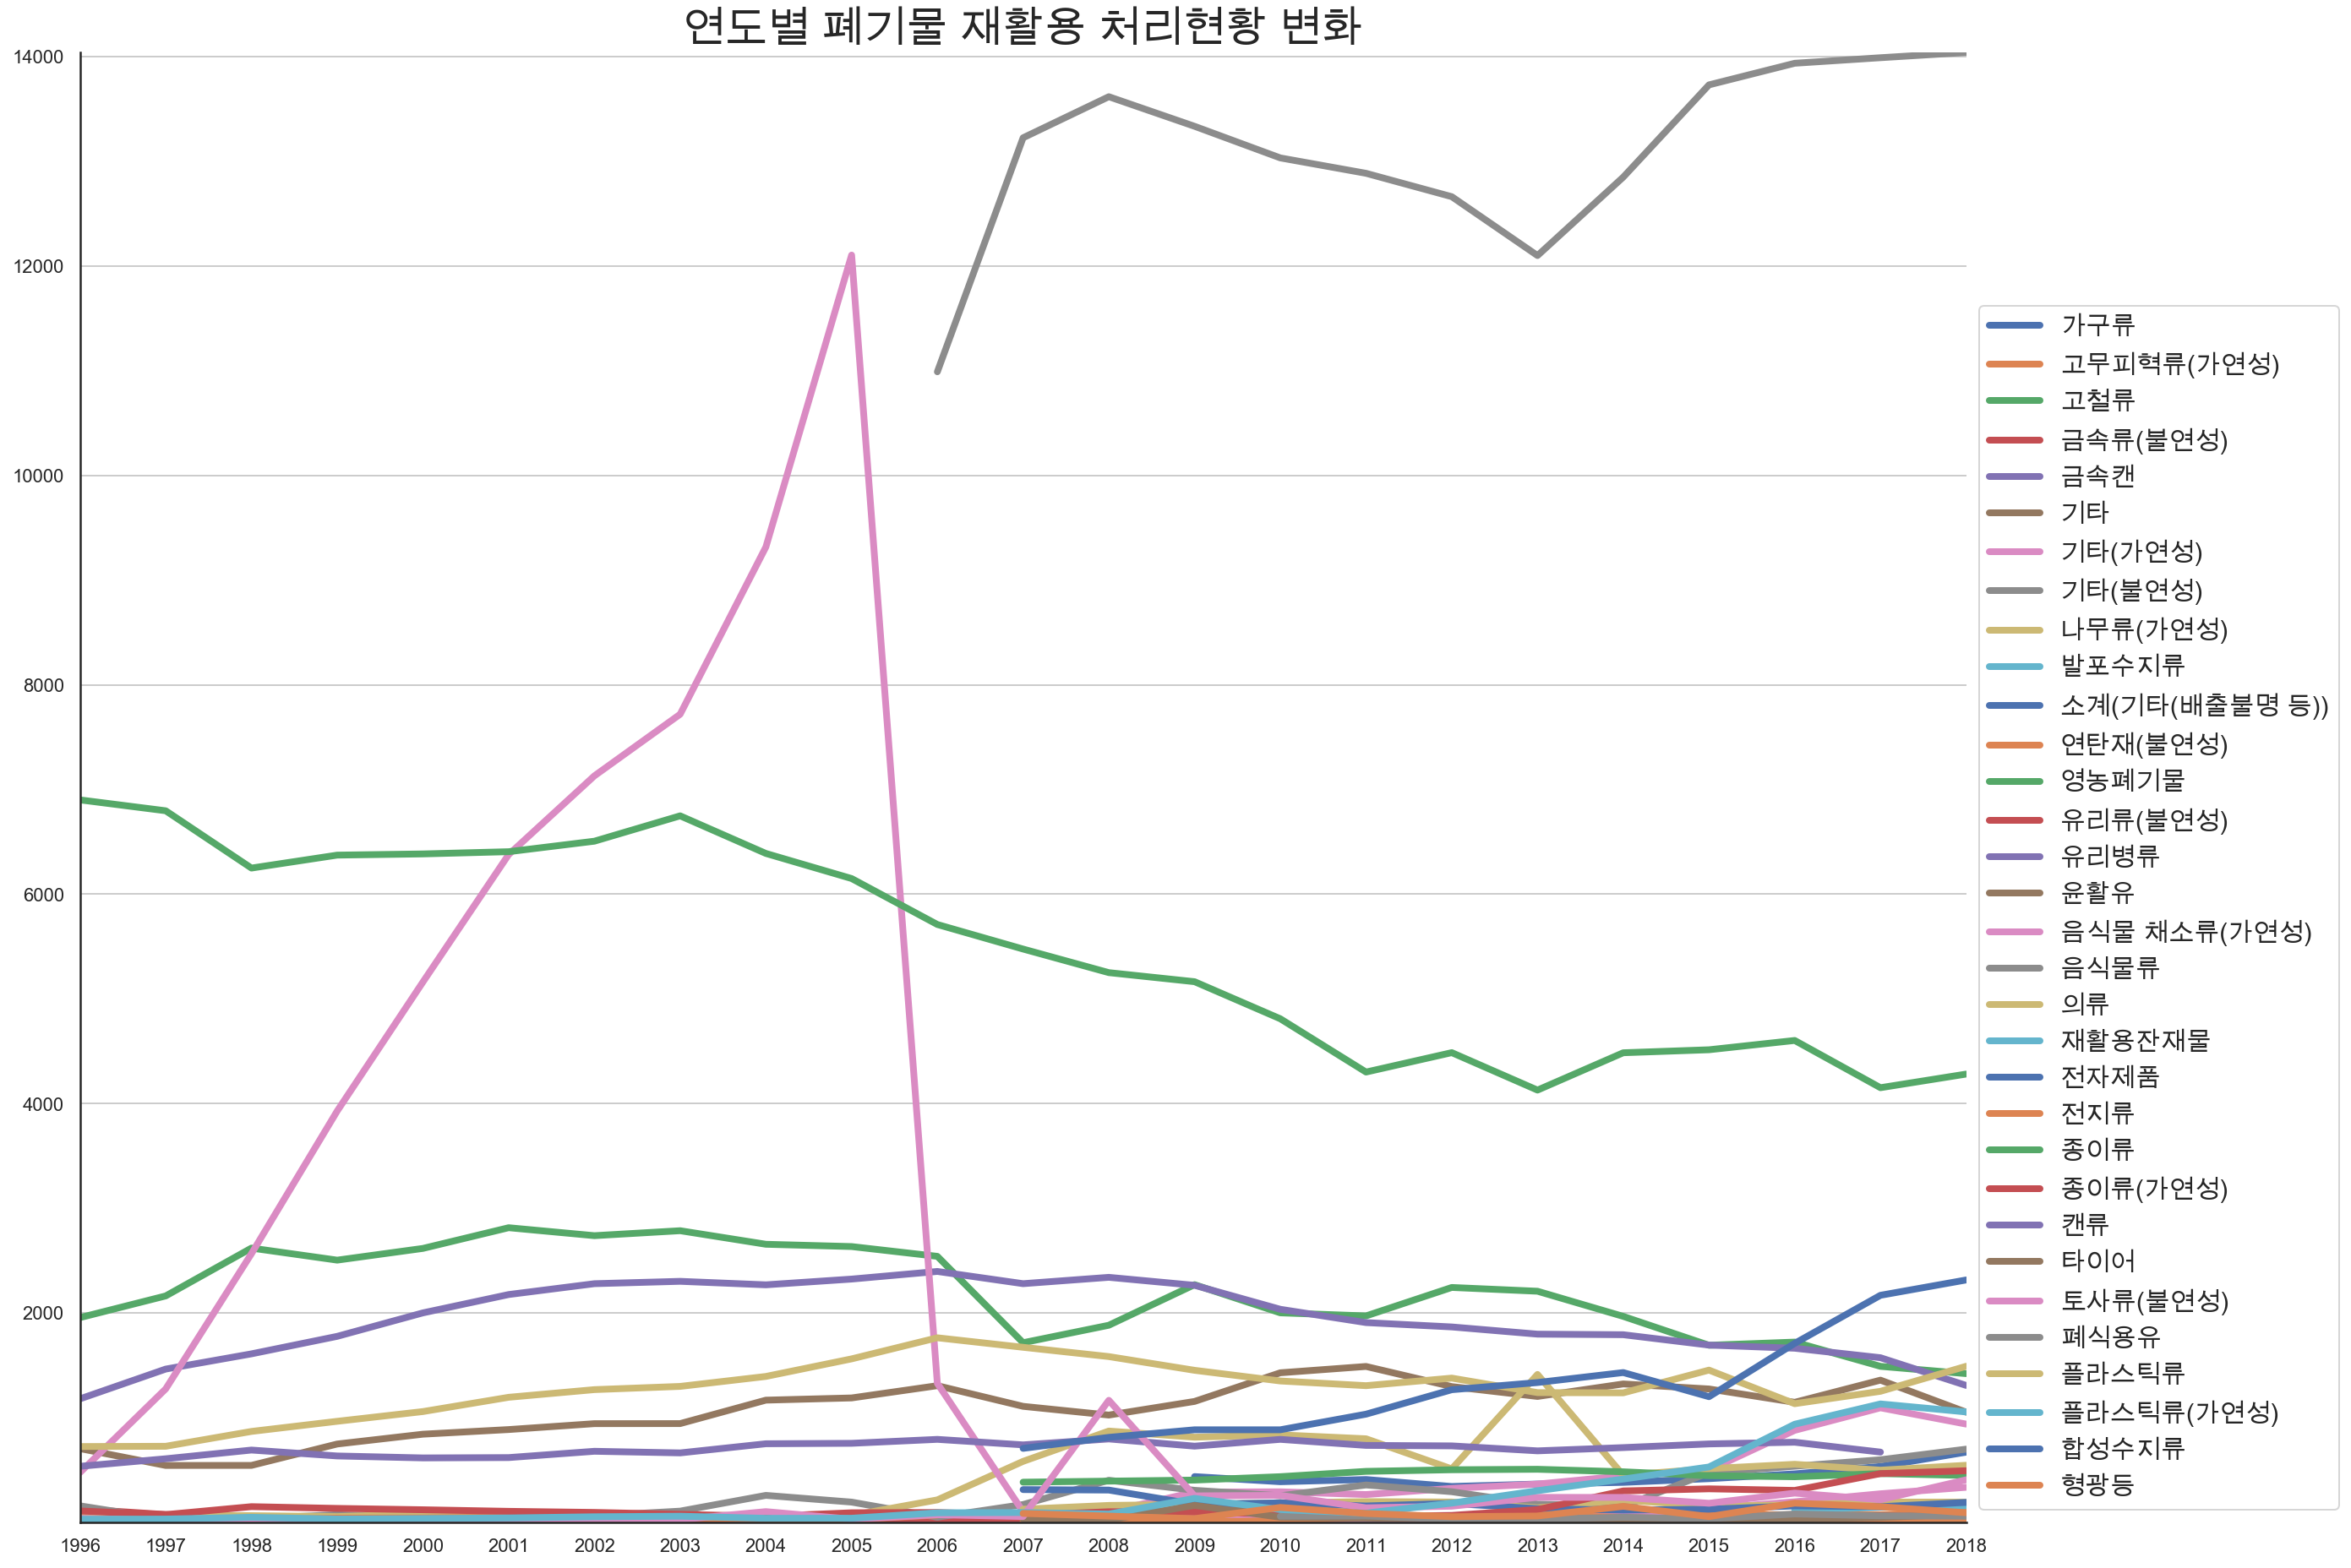

In [54]:
# 분류 전체 대상 line plot

fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(recycle_t.index, recycle_t.values, linewidth=4)
plt.legend(recycle_t.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 재활용 처리현황 변화', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.show()

In [55]:
# 상위권 분류만 추출
recycle_7 = recycle_t[['음식물 채소류(가연성)', '음식물류', '종이류(가연성)', '종이류', '플라스틱류(가연성)', '플라스틱류', '금속캔', '캔류', '나무류(가연성)', '유리병류', '고철류']]
recycle_7.fillna(value=0, inplace=True)
recycle_7.head()

/Users/mieyhgnaj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


음식물 채소류(가연성)  음식물류  종이류(가연성)     종이류  플라스틱류(가연성)   플라스틱류  금속캔     캔류  \
연도                                                                           
1996         475.9   0.0     108.5  6900.4        29.6   724.0  0.0  535.2   
1997        1274.6   0.0      73.7  6796.4        31.2   726.4  0.0  607.2   
1998        2566.0   0.0     149.7  6249.1        48.0   868.2  0.0  690.3   
1999        3928.5   0.0     133.1  6372.9        31.2   964.9  0.0  633.9   
2000        5161.0   0.0     120.1  6384.2        36.1  1058.0  0.0  615.2   

      나무류(가연성)    유리병류     고철류  
연도                              
1996      50.0  1179.3  1955.2  
1997      68.7  1463.8  2162.5  
1998      63.7  1609.2  2619.4  
1999      54.6  1776.4  2504.3  
2000      79.4  2000.6  2616.3

In [56]:
recycle7 = recycle_7.copy()

In [57]:
# 종이류 + 종이류(가연성), 금속캔 + 캔류, 음식물 채소류(가연성) + 음식물류, 플라스틱류(가연성) + 플라스틱류

recycle7['종이류'] = recycle7['종이류']+recycle7['종이류(가연성)']
recycle7['캔류'] = recycle7['금속캔']+recycle7['캔류']
recycle7['음식물류'] = recycle7['음식물류']+recycle7['음식물 채소류(가연성)']
recycle7['플라스틱류'] = recycle7['플라스틱류']+recycle7['플라스틱류(가연성)']
recycle7.drop(['종이류(가연성)', '금속캔', '음식물 채소류(가연성)',
               '플라스틱류(가연성)'], axis=1, inplace=True)
recycle7.head()

음식물류     종이류   플라스틱류     캔류  나무류(가연성)    유리병류     고철류
연도                                                           
1996   475.9  7008.9   753.6  535.2      50.0  1179.3  1955.2
1997  1274.6  6870.1   757.6  607.2      68.7  1463.8  2162.5
1998  2566.0  6398.8   916.2  690.3      63.7  1609.2  2619.4
1999  3928.5  6506.0   996.1  633.9      54.6  1776.4  2504.3
2000  5161.0  6504.3  1094.1  615.2      79.4  2000.6  2616.3

In [58]:
# 컬럼명 보기 쉽게 수정
recycle7.columns = ['음식물류', '종이류', '플라스틱류', '캔류', '나무류', '음식물류', '고철류']
recycle7.head()

음식물류     종이류   플라스틱류     캔류   나무류    음식물류     고철류
연도                                                       
1996   475.9  7008.9   753.6  535.2  50.0  1179.3  1955.2
1997  1274.6  6870.1   757.6  607.2  68.7  1463.8  2162.5
1998  2566.0  6398.8   916.2  690.3  63.7  1609.2  2619.4
1999  3928.5  6506.0   996.1  633.9  54.6  1776.4  2504.3
2000  5161.0  6504.3  1094.1  615.2  79.4  2000.6  2616.3

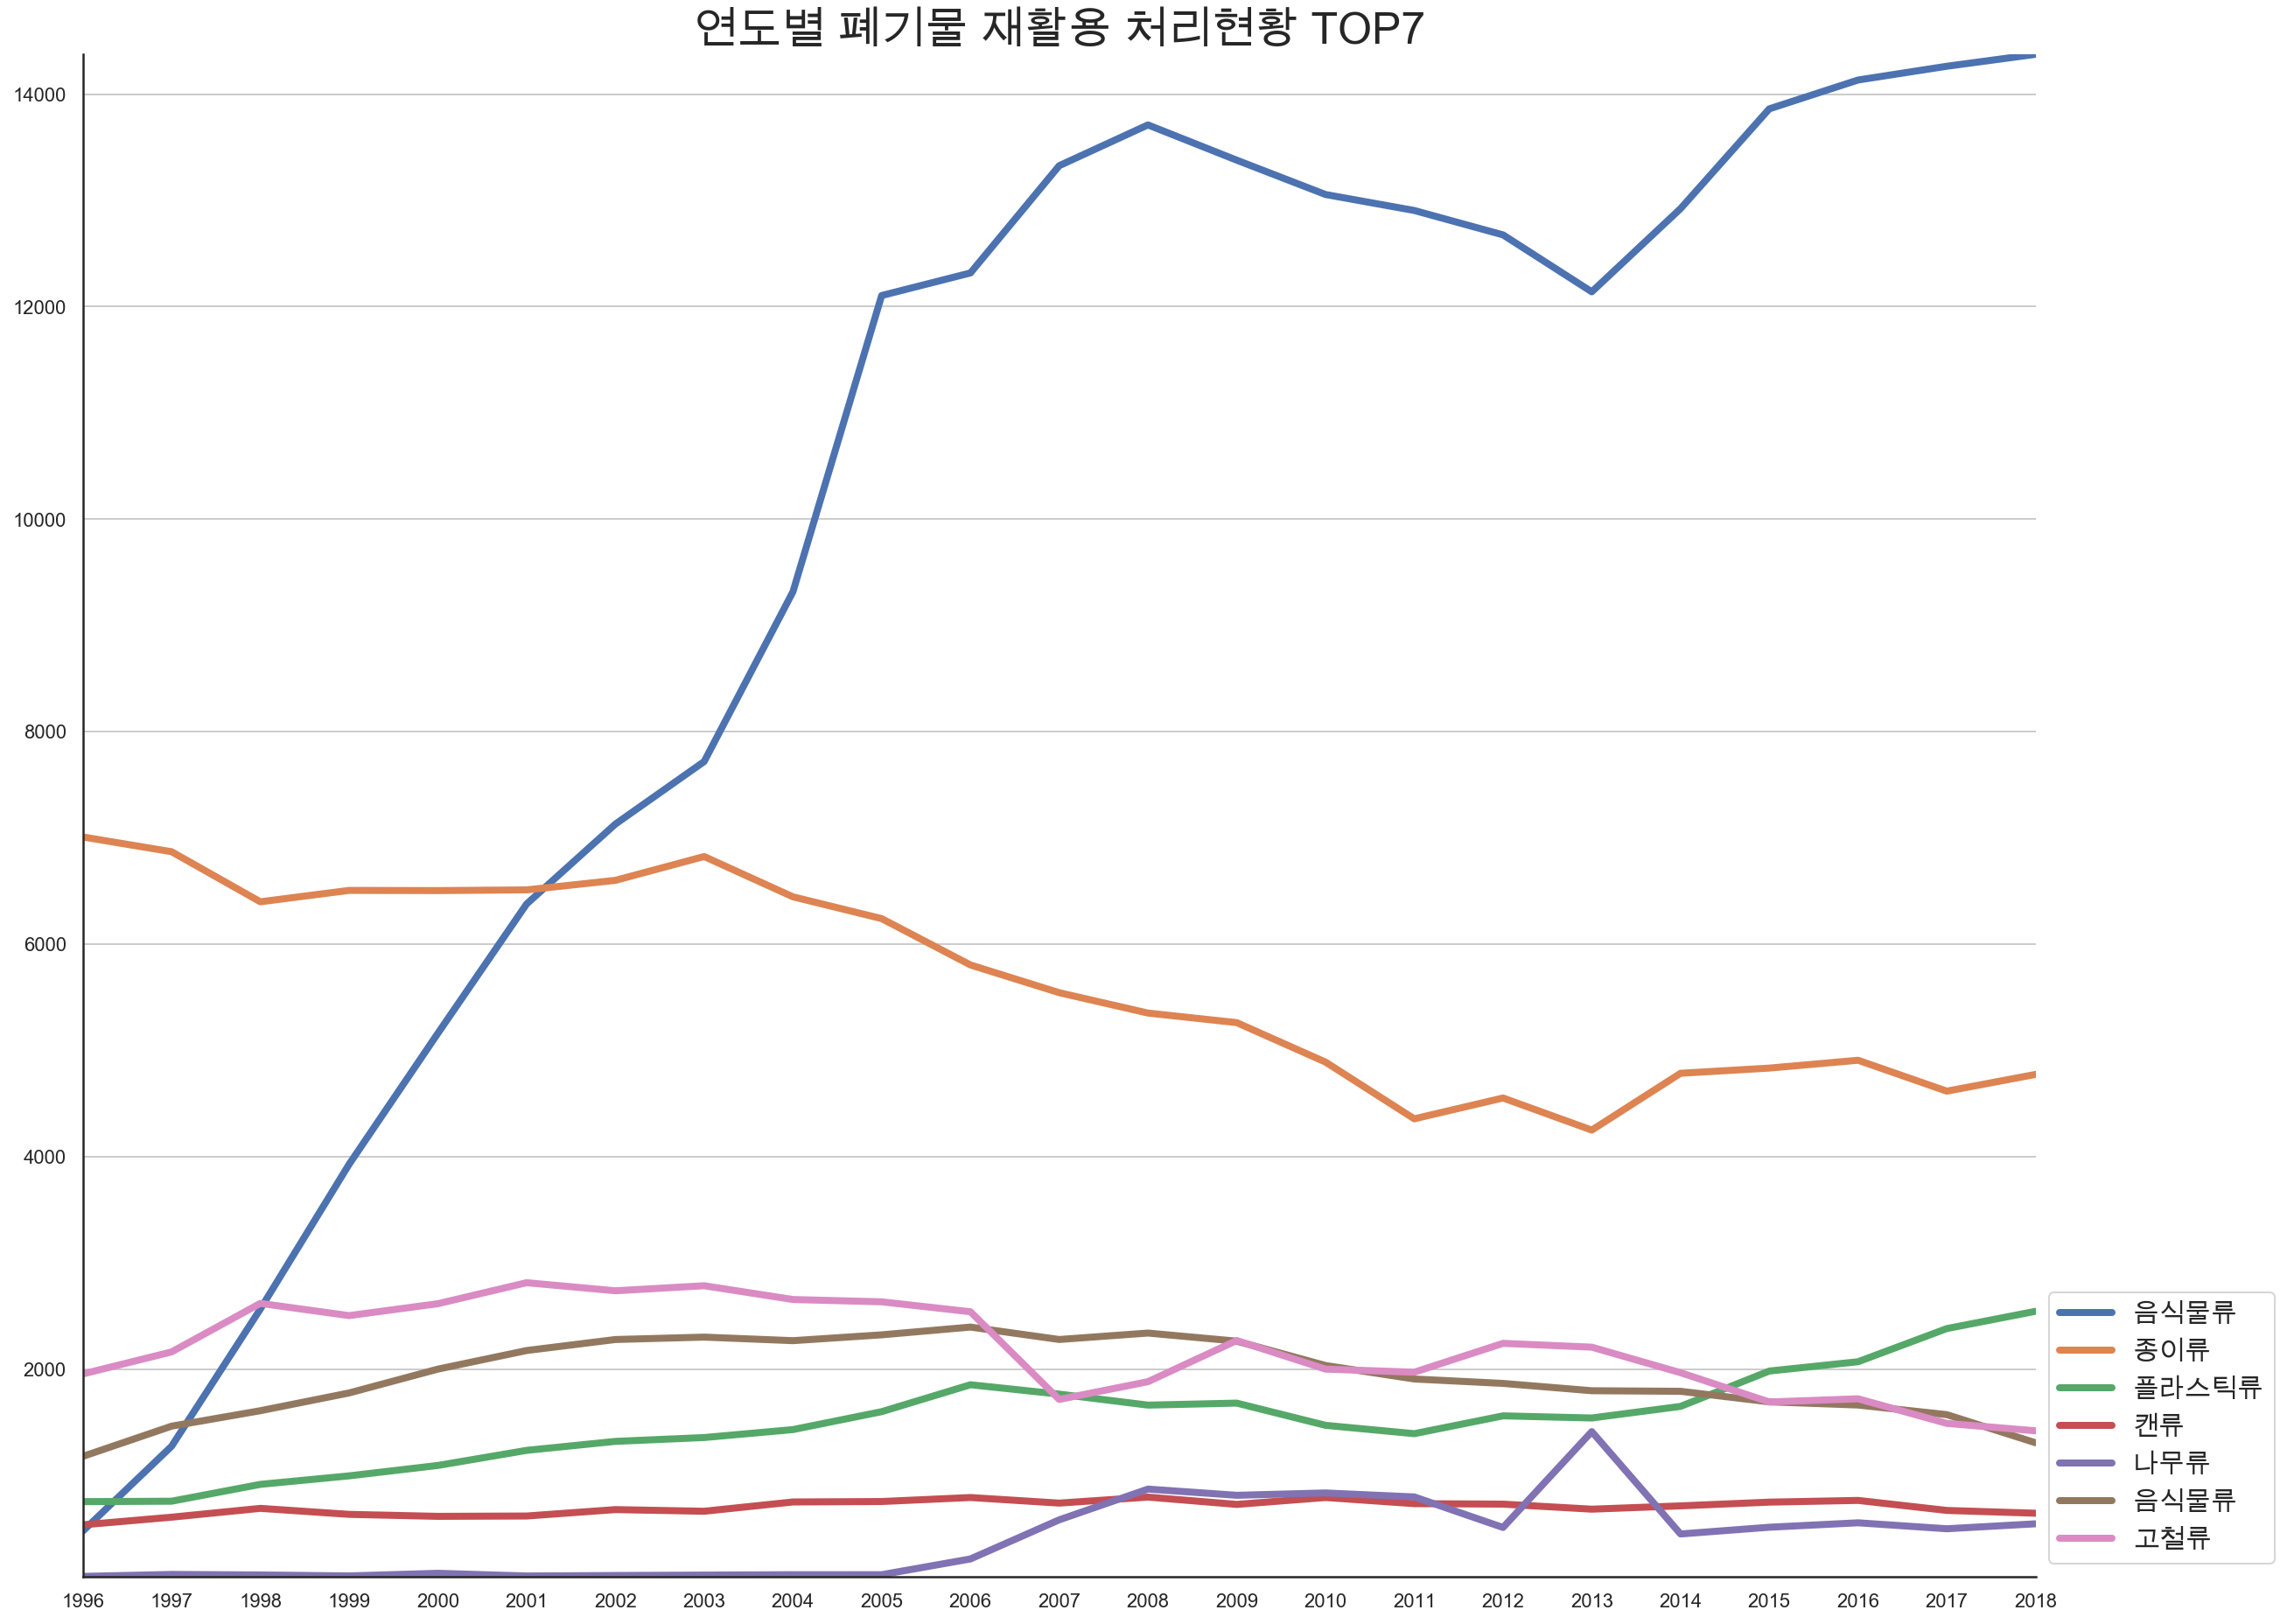

In [59]:
fig, ax = plt.subplots(figsize=(20, 16))

plt.plot(recycle7.index, recycle7.values, linewidth=4)
plt.legend(recycle7.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
sns.despine()
ax.set_title('연도별 폐기물 재활용 처리현황 TOP7', fontsize=25)
ax.yaxis.grid()
ax.margins(x=0, y=0)
plt.savefig('./image/recycle7.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. 음식물류 폐기물 발생현황

In [60]:
df_waste_total.tail()

연도      발생량  매립 처리량  소각 처리량  재활용 처리량  기타 처리량
가구류     2018    670.1     0.0     0.0    670.1     0.0
폐식용유    2018     58.7     0.0     0.0     58.7     0.0
재활용잔재물  2018   1546.5     0.0     0.0   1546.5     0.0
기타      2018   1052.1     0.0     0.0   1052.1     0.0
음식물류    2018  14477.2   140.6   297.0  14039.6     0.0

In [61]:
# 음식물 관련만 추출 (음식물류, 음식물 채소류(가연성))
df_waste_for_food = df_waste_total.loc[['음식물류','음식물 채소류(가연성)']]
df_waste_for_food.head()

연도      발생량  매립 처리량  소각 처리량  재활용 처리량  기타 처리량
음식물류  2006  11462.8    44.6   179.7  10989.3   249.2
음식물류  2007  13753.7   165.3   363.8  13224.5     0.0
음식물류  2008  14026.2    97.0   312.3  13616.9     0.0
음식물류  2009  13701.1    66.7   300.1  13334.3     0.0
음식물류  2010  13428.6   108.3   288.0  13032.3     0.0

In [62]:
# 전국 발생량 파악을 위해 발생량만 추출
waste_food = df_waste_for_food[['연도', '발생량']]
waste_food[8:15]

연도      발생량
음식물류          2014  13221.5
음식물류          2015  14219.5
음식물류          2016  14388.7
음식물류          2017  14399.9
음식물류          2018  14477.2
음식물 채소류(가연성)  1996  14531.8
음식물 채소류(가연성)  1997  13062.7

In [63]:
# 연도 기준으로 합치기
df_waste_food = waste_food.groupby("연도").agg("sum")
df_waste_food.head()

발생량
연도           
1996  14531.8
1997  13062.7
1998  11797.9
1999  11577.1
2000  11434.1

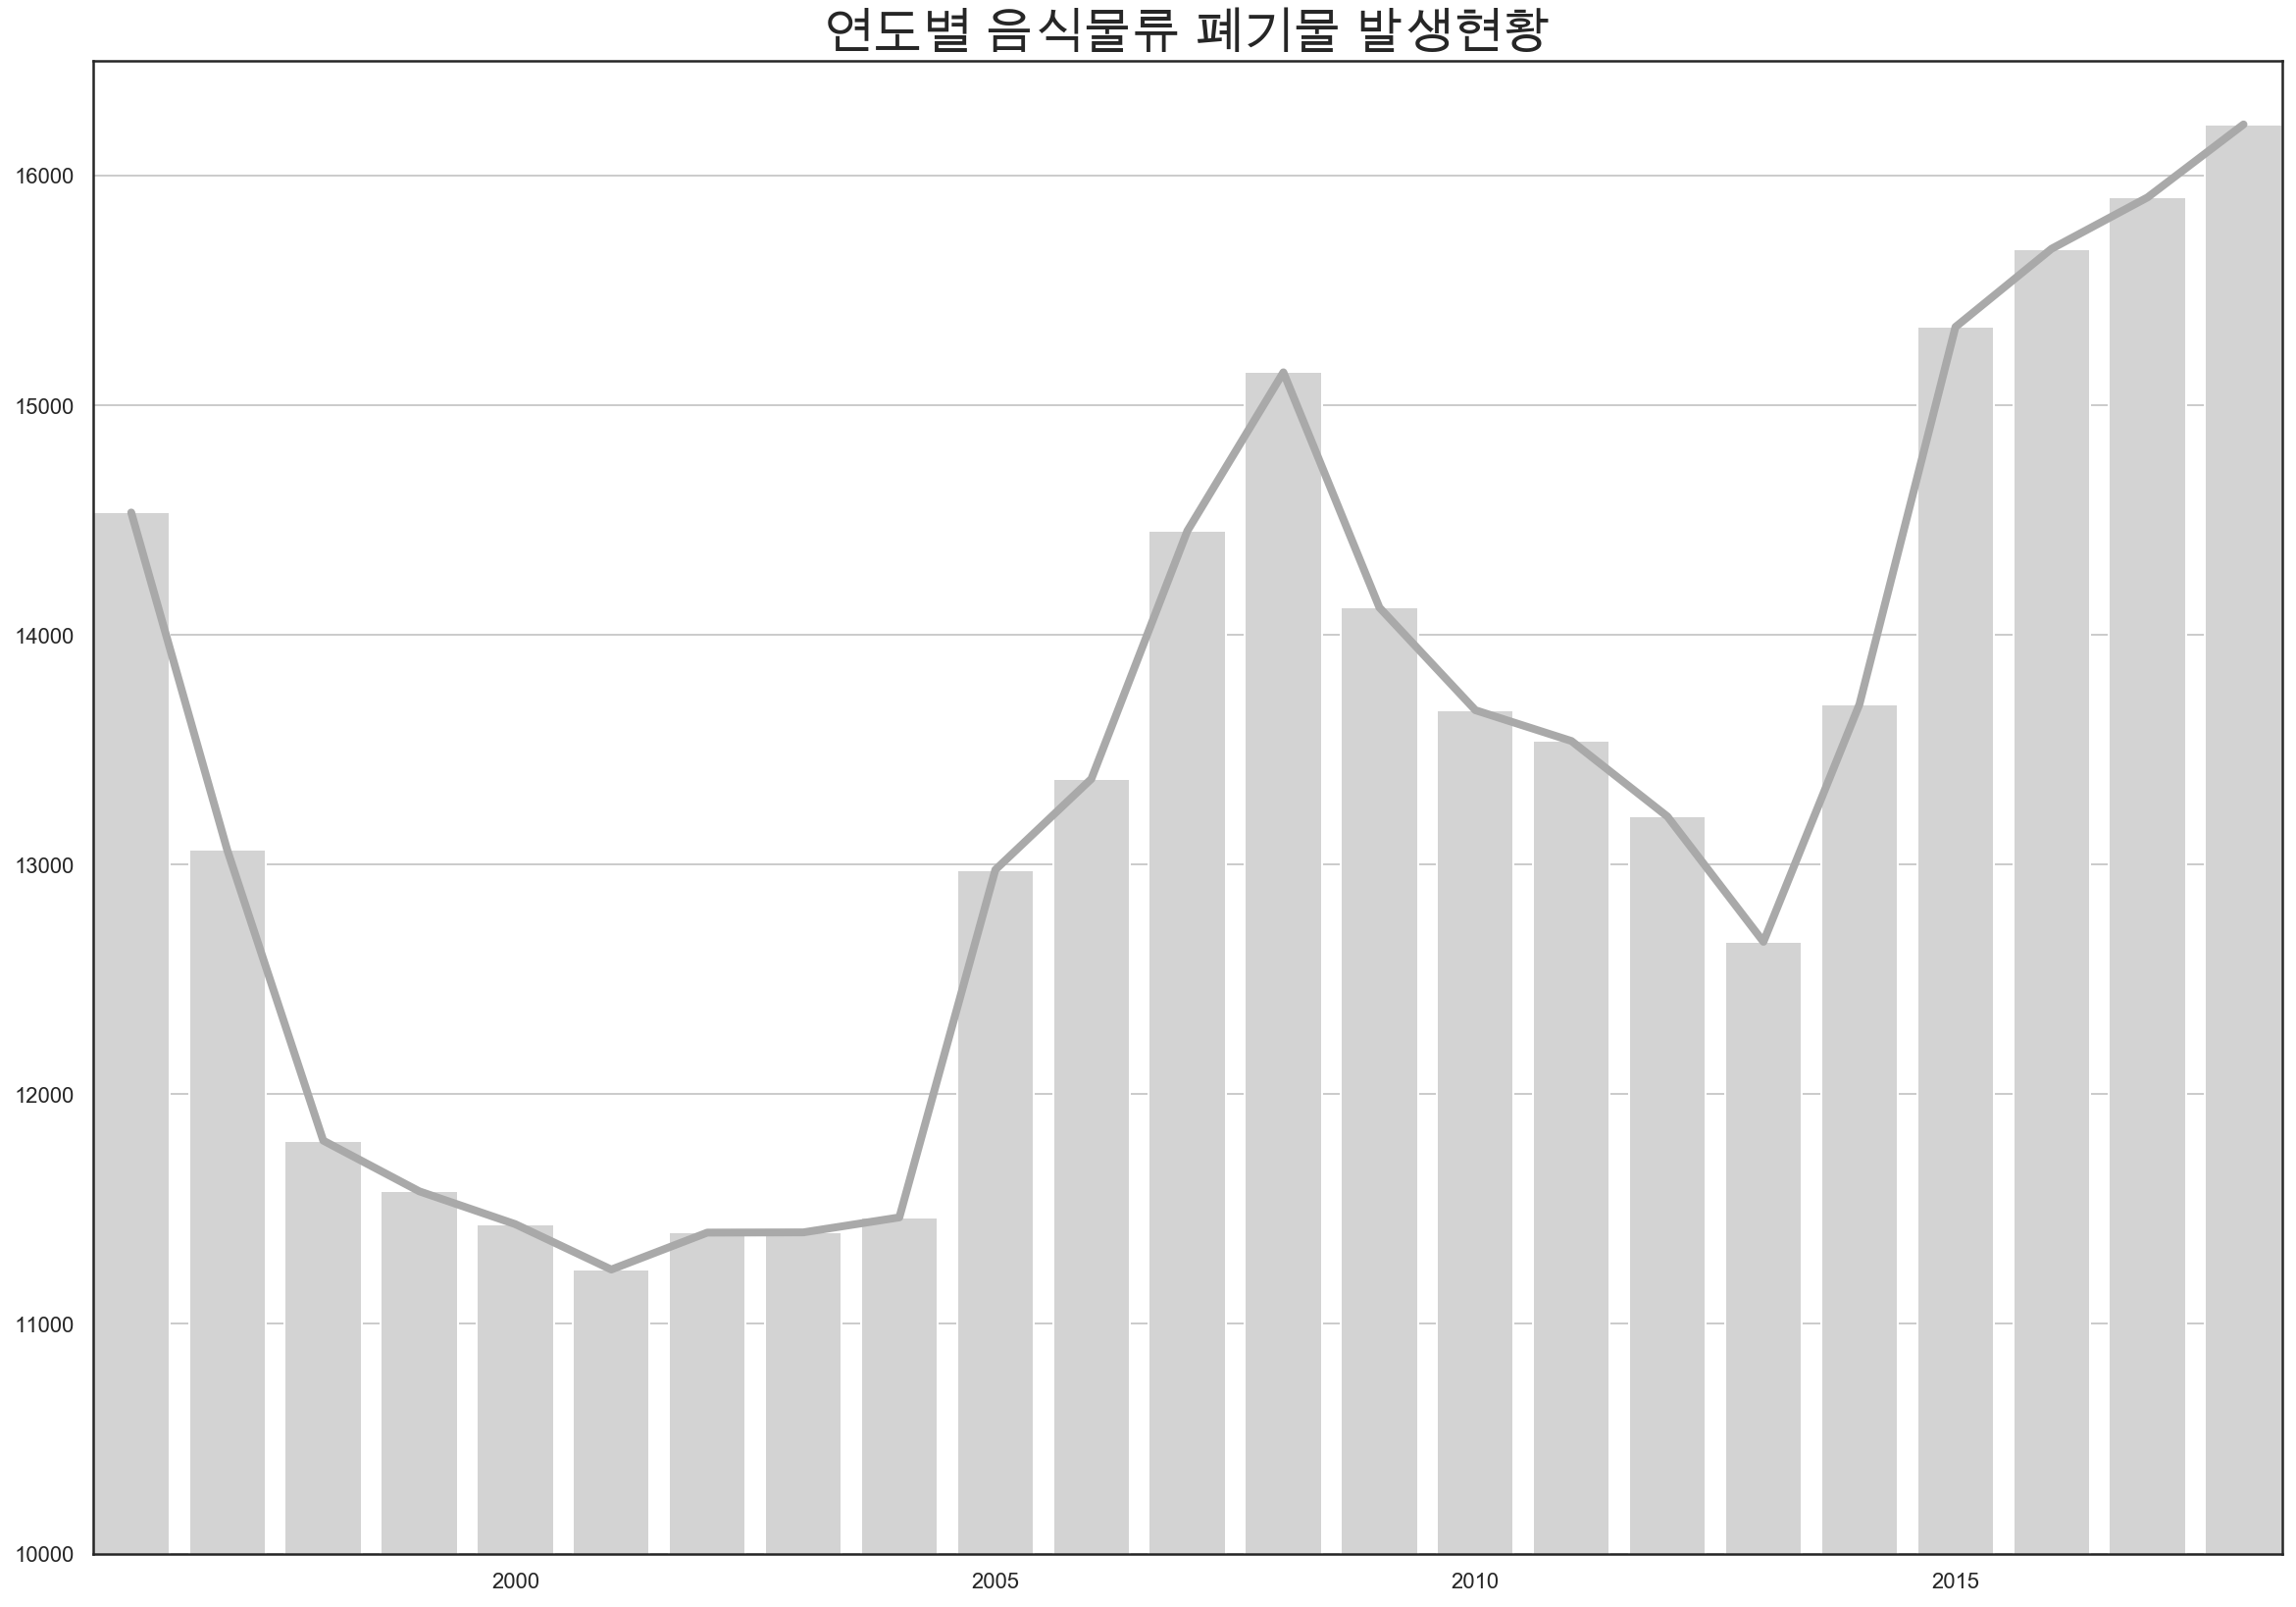

In [64]:
fig, ax = plt.subplots(figsize=(20, 14))

plt.plot(df_waste_food.index, df_waste_food['발생량'], color='darkgrey', linewidth=4)
ax.bar(df_waste_food.index, df_waste_food['발생량'], color='lightgrey')


ax.set_title('연도별 음식물류 폐기물 발생현황', fontsize=25)
ax.yaxis.grid()

ax.set_facecolor('none')
ax.margins(x=0, y=0)
ax.set(ylim=(10000, 16500))

plt.savefig('./image/waste_food.png', dpi=150, bbox_inches='tight')
plt.show()